In [96]:
import pandas as pd
import numpy as np
import plotly.express as px
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

## **Data Preparation and Exploratory Data Analysis**

Importing the final *global.csv* file that we are going to work on and perform our ***Data Preparation*** and ***Exploratory Data Analysis.***

In [159]:
#Importing the global data.csv
df = pd.read_csv("data.csv")
df

Unnamed: 0  TraceabilityCode                     time  \
0                0  1010123004112008  2023-01-04 12:20:31.786   
1                1  1010123004112015  2023-01-04 12:20:38.946   
2                2  1010123004112023  2023-01-04 12:20:46.506   
3                3  1010123004112030  2023-01-04 12:20:53.176   
4                4  1010123004112038  2023-01-04 12:21:00.756   
...            ...               ...                      ...   
143755      143755  1012623040042446                      NaN   
143756      143756  1012623048044806                      NaN   
143757      143757  1012623048220650                      NaN   
143758      143758  1012623048221501                      NaN   
143759      143759  1012623048222115                      NaN   

        AmbientHumidity  AmbientTemperature  ClutchBrakeTemperatureUnitOil  \
0             20.583333           25.344774                      54.935576   
1             20.500000           25.344774                      54.935576   
2             20.400000           25.344774                      54.935576   
3             20.450000           25.500000                      51.000000   
4             20.366667           25.344774                      54.935576   
...                 ...                 ...                            ...   
143755              NaN                 NaN                            NaN   
143756              NaN                 NaN                            NaN   
143757              NaN                 NaN                            NaN   
143758              NaN                 NaN                            NaN   
143759              NaN                 NaN                            NaN   

        ClutchBrakeWaterTemperature  CushionPumpMaxPower1  \
0                         31.518654             52.577394   
1                         31.518654             52.577394   
2                         31.518654             52.577394   
3                         30.300000             52.577394   
4                         31.518654             52.577394   
...                             ...                   ...   
143755                          NaN                   NaN   
143756                          NaN                   NaN   
143757                          NaN                   NaN   
143758                          NaN                   NaN   
143759                          NaN                   NaN   

        CushionPumpMaxPower2  CushionPumpMaxPower3  CushionPumpMeanPower1  \
0                  55.519264             52.385396              51.289236   
1                  55.519264             52.385396              51.289236   
2                  55.519264             52.385396              51.289236   
3                  55.519264             52.385396              50.500000   
4                  55.519264             52.385396              51.289236   
...                      ...                   ...                    ...   
143755                   NaN                   NaN                    NaN   
143756                   NaN                   NaN                    NaN   
143757                   NaN                   NaN                    NaN   
143758                   NaN                   NaN                    NaN   
143759                   NaN                   NaN                    NaN   

        CushionPumpMeanPower2  CushionPumpMeanPower3  \
0                   52.231495               5.100694   
1                   52.231495               5.100694   
2                   52.231495               5.100694   
3                   52.231495               5.100694   
4                   52.231495               5.100694   
...                       ...                    ...   
143755                    NaN                    NaN   
143756                    NaN                    NaN   
143757                    NaN                    NaN   
143758                    NaN                    NaN   
143759          

Checking the shape of our DataFrame.

In [160]:
#Shape of Dataframe
df.shape

(143760, 224)

In [161]:
#Number of unique TraceabilityCodes
df["TraceabilityCode"].nunique()

143742

In [162]:
#Checking if there are any NaN values for TraceabilityCode
df["TraceabilityCode"].isna().any()

False

It seems that there are some duplicate rows for the same **TraceabilityCode**, but let's confirm.

In [163]:
#Total number of Rows
total_rows = df.shape[0]

#Unique TraceabilityCodes
unique_traceability_codes = df["TraceabilityCode"].nunique()

#Duplicated rows
duplicated_traceability_codes = total_rows - unique_traceability_codes

#Printing the results
print("There are", duplicated_traceability_codes, "duplicated TraceabilityCodes.")

There are 18 duplicated TraceabilityCodes.


Inspecting the duplicated rows.

In [164]:
duplicate_mask = df.duplicated(subset="TraceabilityCode", keep=False)
duplicate_rows = df[duplicate_mask]

duplicate_rows.head(5)

Unnamed: 0  TraceabilityCode                     time  AmbientHumidity  \
11473       11473  1010123016094317  2023-01-16 10:43:43.747             21.4   
11474       11474  1010123016094317  2023-01-16 10:43:43.747             21.4   
26026       26026  1010123030155853  2023-01-30 16:59:29.043             23.4   
26027       26027  1010123030155853  2023-01-30 16:59:29.043             23.4   
26028       26028  1010123030155853  2023-01-30 16:59:29.043             23.4   

       AmbientTemperature  ClutchBrakeTemperatureUnitOil  \
11473           25.281109                      50.500000   
11474           25.281109                      50.500000   
26026           22.800000                      46.016013   
26027           22.800000                      46.016013   
26028           22.800000                      46.016013   

       ClutchBrakeWaterTemperature  CushionPumpMaxPower1  \
11473                         31.7                  40.8   
11474                         31.7                  40.8   
26026                         27.9                  52.5   
26027                         27.9                  52.5   
26028                         27.9                  52.5   

       CushionPumpMaxPower2  CushionPumpMaxPower3  CushionPumpMeanPower1  \
11473             43.500000              42.00000                   39.4   
11474             43.500000              42.00000                   39.4   
26026             55.422222              52.23646                   51.0   
26027             55.422222              52.23646                   51.0   
26028             55.422222              52.23646                   51.0   

       CushionPumpMeanPower2  CushionPumpMeanPower3  \
11473                   41.6                   40.4   
11474                   41.6                   40.4   
26026                   53.9                   37.3   
26027                   53.9                   37.3   
26028                   53.9                   37.3   

       CushionTemperatureUnitOil  CushionWaterFlow  CushionWaterTemperature  \
11473                  64.298608             335.8                34.500000   
11474                  64.298608             335.8                34.500000   
26026                  62.800000             328.6                32.924472   
26027                  62.800000             328.6                32.924472   
26028                  62.800000             328.6                32.924472   

       Cylinder1MaxForce  Cylinder1MaxParallelismInCycle  Cylinder2MaxForce  \
11473               93.1                        5.322226          78.560327   
11474               93.1                        5.322226          78.560327   
26026               64.5                        5.648932          67.600000   
26027               64.5                        5.648932          67.600000   
26028               64.5                        5.648932          67.600000   

       Cylinder2MaxParalelismErrorInBDC  Cylinder2MaxParallelismInCycle  \
11473                          0.719963                        6.458434   
11474                          0.719963                        6.458434   
26026                          0.835106                        6.600000   
26027                          0.835106                        6.600000   
26028                          0.835106                        6.600000   

       Cylinder3MaxForce  Cylinder3MaxParalelismErrorInBDC  \
11473               92.8                          4.526300   
11474               92.8                          4.526300   
26026               73.7                          4.722785   
26027               73.7                          4.722785   
26028               73.7                          4.722785   

       Cylinder3MaxParallelismInCycle  Cylinder4MaxForce  \
11473                       10.419988               84.6   
11474                       10.419988               84.6   
26026                       11.057947               71.2

Let's get rid of the duplicates by keeping only the first.

In [165]:
#Droping duplicates - keeping the first row
unique_rows = df.drop_duplicates(subset="TraceabilityCode", keep="first", inplace = True)

Rechecking the shape of the DataFrame to confirm.

In [166]:
print("There are ", df.shape[0], " rows on the merged dataframe")
print("There are ", df["TraceabilityCode"].nunique(), " unique TraceabilityCodes")

There are  143742  rows on the merged dataframe
There are  143742  unique TraceabilityCodes


Everything checks out. We have ensured that every single row represents one carpart with it's unique **TraceabilityCode**.

Each car part belongs to a type (**DieReference**). Let's check if all of the **DieReference** match for every single row.

In [167]:
die_reference_columns = [col for col in df.columns if col.startswith("DieReference")]

traceability_dieref_df = df.loc[:, ["TraceabilityCode"] + die_reference_columns]
traceability_dieref_df.head(5)

TraceabilityCode  DieReference  DieReference_02  DieReference_03  \
0  1010123004112008          20.0             20.0              NaN   
1  1010123004112015          20.0             20.0              NaN   
2  1010123004112023          20.0             20.0              NaN   
3  1010123004112030          20.0             20.0              NaN   
4  1010123004112038          20.0             20.0              NaN   

   DieReference_04  DieReference_05  DieReference_06  
0              NaN              NaN              NaN  
1              NaN              NaN              NaN  
2              NaN              NaN              NaN  
3              NaN              NaN              NaN  
4              NaN              NaN              NaN

Let's get the mode  and create a new one with the **DieReference.**

In [168]:
df["DieReference_0"] = df[
    die_reference_columns
].apply(lambda row: np.nan 
        if all(pd.isnull(val) 
               for val in row)
        else row.mode().iloc[0], axis=1)

In [169]:
df.head(5)

Unnamed: 0  TraceabilityCode                     time  AmbientHumidity  \
0           0  1010123004112008  2023-01-04 12:20:31.786        20.583333   
1           1  1010123004112015  2023-01-04 12:20:38.946        20.500000   
2           2  1010123004112023  2023-01-04 12:20:46.506        20.400000   
3           3  1010123004112030  2023-01-04 12:20:53.176        20.450000   
4           4  1010123004112038  2023-01-04 12:21:00.756        20.366667   

   AmbientTemperature  ClutchBrakeTemperatureUnitOil  \
0           25.344774                      54.935576   
1           25.344774                      54.935576   
2           25.344774                      54.935576   
3           25.500000                      51.000000   
4           25.344774                      54.935576   

   ClutchBrakeWaterTemperature  CushionPumpMaxPower1  CushionPumpMaxPower2  \
0                    31.518654             52.577394             55.519264   
1                    31.518654             52.577394             55.519264   
2                    31.518654             52.577394             55.519264   
3                    30.300000             52.577394             55.519264   
4                    31.518654             52.577394             55.519264   

   CushionPumpMaxPower3  CushionPumpMeanPower1  CushionPumpMeanPower2  \
0             52.385396              51.289236              52.231495   
1             52.385396              51.289236              52.231495   
2             52.385396              51.289236              52.231495   
3             52.385396              50.500000              52.231495   
4             52.385396              51.289236              52.231495   

   CushionPumpMeanPower3  CushionTemperatureUnitOil  CushionWaterFlow  \
0               5.100694                  57.997056        328.963565   
1               5.100694                  57.997056        328.963565   
2               5.100694                  57.997056        328.963565   
3               5.100694                  56.200000        327.300000   
4               5.100694                  57.997056        328.963565   

   CushionWaterTemperature  Cylinder1MaxForce  Cylinder1MaxParallelismInCycle  \
0                32.580519          74.136636                      -47.050183   
1                32.580519          74.136636                      -47.050183   
2                32.580519          74.136636                      -47.050183   
3                32.000000          73.300000                      -46.700000   
4                32.580519          74.136636                      -47.050183   

   Cylinder2MaxForce  Cylinder2MaxParalelismErrorInBDC  \
0          60.491694                          0.819691   
1          60.491694                          0.819691   
2          60.491694                          0.819691   
3          61.600000                          0.819691   
4          60.491694                          0.819691   

   Cylinder2MaxParallelismInCycle  Cylinder3MaxForce  \
0                      -46.116689          65.839439   
1                      -46.116689          65.839439   
2                      -46.116689          65.839439   
3                      -45.800000          65.839439   
4                      -46.116689          65.839439   

   Cylinder3MaxParalelismErrorInBDC  Cylinder3MaxParallelismInCycle  \
0                          4.534219                      -42.546183   
1                          4.534219                      -42.546183   
2                          4.534219                      -42.546183   
3                          4.534219                      -42.200000   
4                          4.534219                      -42.546183   

   Cylinder4MaxForce  Cylinder4MaxParalelismErrorInBDC  \
0          62.797733                         -0.222609   
1          62.797733                         -0.222609   
2          62.797733                         -0.222609   
3          63.200000    

We don't need the ***DieReference*** columns for each of the Presses since one ***TraceabilityCode*** must belongo to one single ***DieReference***, so let's get rid of them to better understand the Data.

In [170]:
df.drop(columns = ["DieReference", "DieReference_02", "DieReference_03", "DieReference_04", "DieReference_05", "DieReference_06"], inplace = True)

Let's rename our columns ***DieReference_0*** to ***DieReference.***

In [171]:
# Rename the column
df = df.rename(columns={"DieReference_0": "DieReference"})

Let's check if we have NaNs for the ***DieReference.***

In [172]:
df["DieReference"].isna().sum()

0

We don't have NaN for the ***DieReference*** so let's continue with our analysis.

Let's get rid of the ***Unnamed: 0*** column in order to increase understandability.

In [173]:
df.drop(columns = ["Unnamed: 0"], inplace = True)

Now with our final DataFrame completed we can begin our analysis.

In [175]:
df.head(1)

TraceabilityCode                     time  AmbientHumidity  \
0  1010123004112008  2023-01-04 12:20:31.786        20.583333   

   AmbientTemperature  ClutchBrakeTemperatureUnitOil  \
0           25.344774                      54.935576   

   ClutchBrakeWaterTemperature  CushionPumpMaxPower1  CushionPumpMaxPower2  \
0                    31.518654             52.577394             55.519264   

   CushionPumpMaxPower3  CushionPumpMeanPower1  CushionPumpMeanPower2  \
0             52.385396              51.289236              52.231495   

   CushionPumpMeanPower3  CushionTemperatureUnitOil  CushionWaterFlow  \
0               5.100694                  57.997056        328.963565   

   CushionWaterTemperature  Cylinder1MaxForce  Cylinder1MaxParallelismInCycle  \
0                32.580519          74.136636                      -47.050183   

   Cylinder2MaxForce  Cylinder2MaxParalelismErrorInBDC  \
0          60.491694                          0.819691   

   Cylinder2MaxParallelismInCycle  Cylinder3MaxForce  \
0                      -46.116689          65.839439   

   Cylinder3MaxParalelismErrorInBDC  Cylinder3MaxParallelismInCycle  \
0                          4.534219                      -42.546183   

   Cylinder4MaxForce  Cylinder4MaxParalelismErrorInBDC  \
0          62.797733                         -0.222609   

   Cylinder4MaxParallelismInCycle  Cylinder5MaxForce  \
0                      -47.055277          60.990169   

   Cylinder5MaxParalelismErrorInBDC  Cylinder5MaxParallelismInCycle  \
0                          0.106448                      -46.745712   

   Cylinder6MaxForce  Cylinder6MaxParalelismErrorInBDC  \
0          63.425736                         -0.048723   

   Cylinder6MaxParallelismInCycle  Cylinder7MaxForce  \
0                      -46.946183          63.290199   

   Cylinder7MaxParalelismErrorInBDC  Cylinder7MaxParallelismInCycle  \
0                         -0.024041                      -46.927997   

   Cylinder8MaxForce  Cylinder8MaxParalelismErrorInBDC  \
0          82.801276                          0.194801   

   Cylinder8MaxParallelismInCycle  Gear1MaxTorque  Gear2MaxTorque  \
0                      -46.533744       42.346964       34.089451   

   Gear3MaxTorque  HELMGaugesControl  LubricationTemperatureUnitOil  \
0       38.212286         105.605246                      32.315176   

   MainMotorMaxPower  MainMotorMeanPower  MaxForceFL  MaxForceFR  MaxForceRL  \
0         203.952148           167.82599   82.676932    60.41395   77.974692   

   MaxForceRR  MaxOffCenteredLoadFR  MaxOffCenteredLoadLR  \
0   78.360597             39.350026             38.803196   

   OverloadSystemPrechargePressure  PartEnergy  PressForceValueFL  \
0                       159.500116  148.789316          76.001164   

   PressForceValueFR  PressForceValueRL  PressForceValueRR  ProcessEnergy  \
0          75.995789          74.272886          71.457377       2.271339   

   SlideAccelerationDown  SlideAccelerationUp  SlidePositionDown  \
0             993.736528          2544.410308         -32.811458   

   SlidePositionUp  SlideSpeedDown  SlideSpeedUp  TotalMaxForce  \
0        15.439189     -318.798806    274.132048      74.802273   

   TotalPressForceValue                  time_02  \
0             74.439372  2023-01-04 12:20:40.676   

   ClutchBrakeTemperatureUnitOil_02  Gear1MaxTorque_02  Gear2MaxTorque_02  \
0                         55.010388                7.8               11.9   

   Gear3MaxTorque_02  HELMGaugesControl_02  LubricationTemperatureUnitOil_02  \
0                9.8                  53.6                              26.0   

   MainMotorMaxPower_02  MainMotorMeanPower_02  MaxForceFL_02  MaxForceFR_02  \
0                 152.1                   58.2           25.7           33.5   

   MaxForceRL_02  MaxForceRR_02  MaxOffCenteredLoadFR_02  \
0           41.0           31.7                     10.4   

   MaxOffCenteredLoadLR_02  OverloadSystemPrechargePressure_02  PartEnergy

## **Exploratory Data Analysis**

In this section of the Notebook we are going to perform **Exploratory Data Analysis.**

Our main objective is to do preventive analysis regarding **Defects**. Therefore, we first need to analysis our target variable **Defects**.

In [176]:
print("There were observed ", df["Defect"].value_counts().sum(), " defected car parts.")

There were observed  291  defected car parts.


Let's check the distribution.

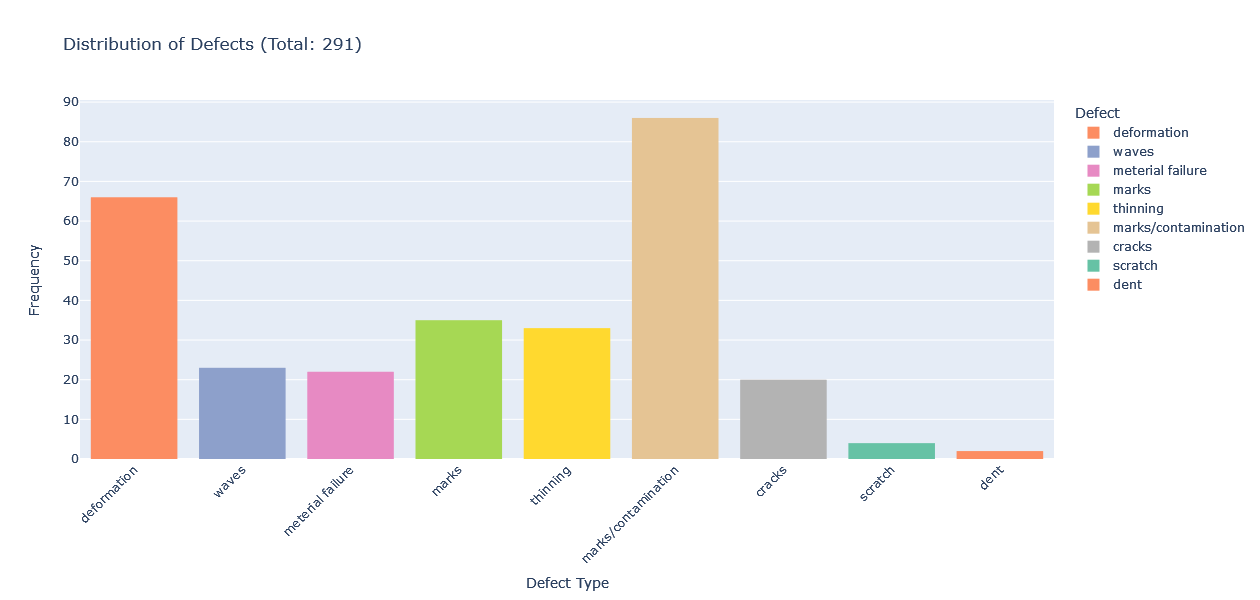

In [177]:
# Calculate the total number of defected car parts
total_defected_parts = df["Defect"].value_counts().sum()

# Create a bar plot for the distribution of defects
fig = px.histogram(df, x="Defect", color="Defect", title="Distribution of Defects (Total: {})".format(total_defected_parts),
                   color_discrete_sequence=px.colors.qualitative.Set2)

# Customize the layout
fig.update_layout(xaxis_title="Defect Type", yaxis_title="Frequency", xaxis_tickangle=-45,
                  height=600, width=1200)

# Show the plot
fig.show()

The most common ***Defect*** it's the **Marks/Contamination** with 86 defects, followed by **Deformation.** On the other hand, **Scratch** and **Dent** are the defects that occur the less, with 4 and 2 defects respectively.

Let's take at the **Defects** over time.

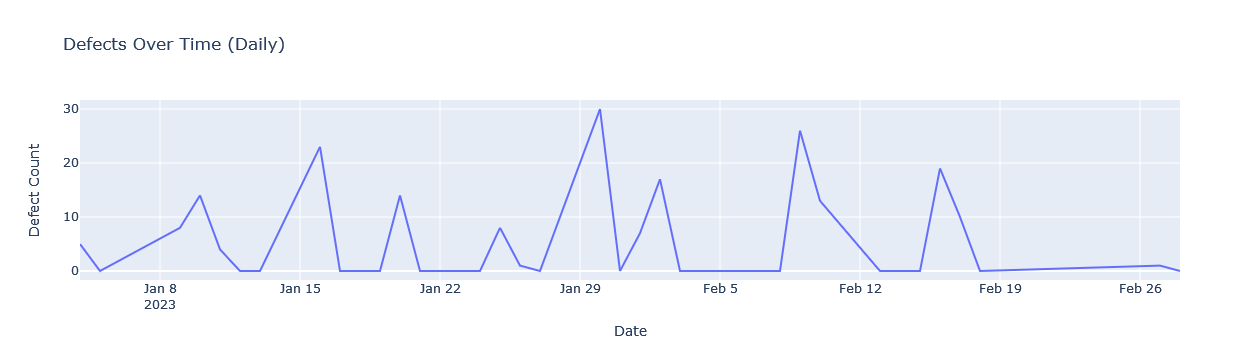

In [178]:
# Convert the Date column to datetime
df["time"] = pd.to_datetime(df["time"])

# Group the data by day and count the occurrences of defects
defects_over_time = df.groupby(df["time"].dt.date)["Defect"].count().reset_index(name="Defect Count")

# Create the line plot
fig = px.line(defects_over_time, x="time", y="Defect Count", title="Defects Over Time (Daily)")

# Customize the layout
fig.update_layout(xaxis_title="Date", yaxis_title="Defect Count")

# Show the plot
fig.show()

As we can see from the Line chart above the **Defect** have been flactuating over time, however the day where most of the **Defects** were detected was on January 30th of 2023 with 30 defects detected.

Let's take a look at the number of occurences per type of **Defect** overtime.

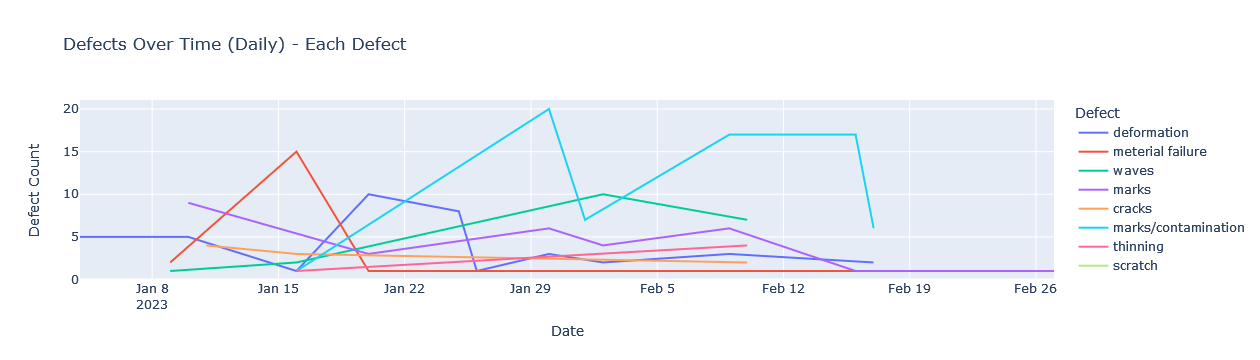

In [179]:
# Group the data by day and count the occurrences of defects for each defect type
defects_over_time = df.groupby([df["time"].dt.date, "Defect"]).size().reset_index(name="Defect Count")

# Create the line plot
fig = px.line(defects_over_time, x="time", y="Defect Count", color="Defect",
              title="Defects Over Time (Daily) - Each Defect")

# Customize the layout
fig.update_layout(xaxis_title="Date", yaxis_title="Defect Count")

# Show the plot
fig.show()

Insights from the Line graph above:
    
    - Cracks have been decreasing overtime;
    
    - Waves have been increasing;
    
    - Marks/Contamination but there was one week where that were detect a the same number of defects.
    
    - Scratchs have been decreasing;
    
    - Deformation is flactuating.
    
    - Thinning has been increasing.

Now let's take a look at the carparts that Gestamp produces by analyzing the **DieReference** column.

In [180]:
unique_dieref = df["DieReference"].nunique()
print("Gestamp currently produces ", unique_dieref, " unique car parts.")

Gestamp currently produces  33  unique car parts.


Let's plot the data and see the most common ones.

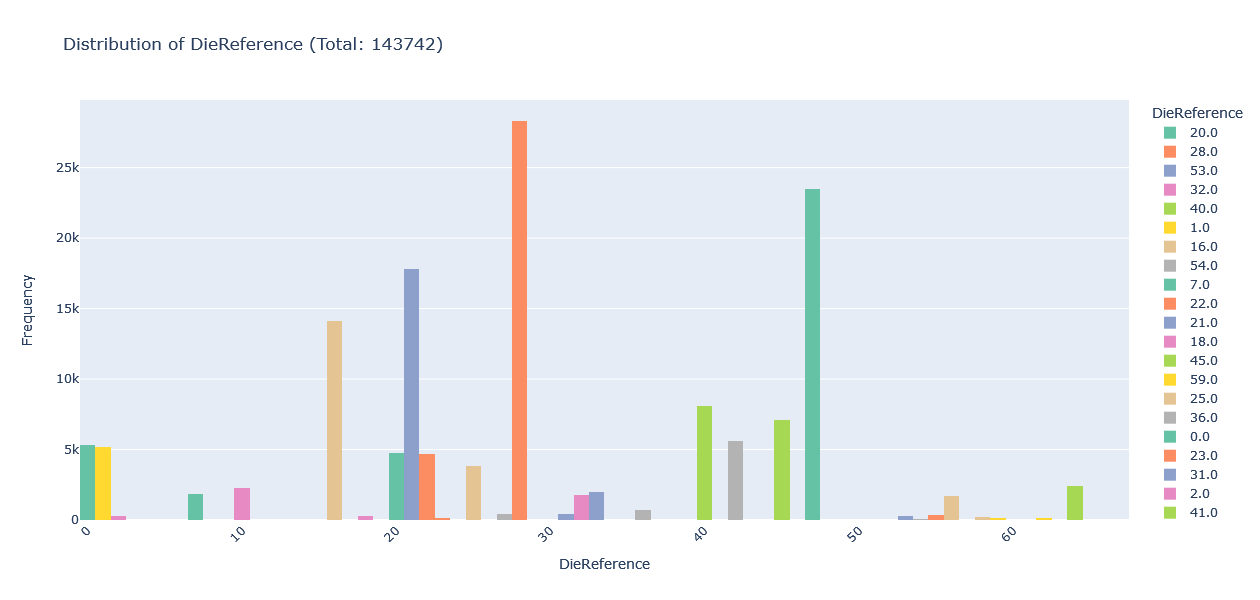

In [181]:
# Calculate the total number of defected car parts
total_dieref = df["DieReference"].value_counts().sum()

# Create a bar plot for the distribution of defects
fig = px.histogram(df, x="DieReference", color="DieReference", title="Distribution of DieReference (Total: {})".format(total_dieref),
                   color_discrete_sequence=px.colors.qualitative.Set2)

# Customize the layout
fig.update_layout(xaxis_title="DieReference", yaxis_title="Frequency", xaxis_tickangle=-45,
                  height=600, width=1200)

# Show the plot
fig.show()

With the plot above we can see that Gestamp mostly produces DieReferences number 28 with 28.306 carparts produced followed by DieReference 47 with 23.494 DieReferences produced. On the other hand only 10 carparts were manufactured with the DieReference 67.

In [182]:
# Group the data by DieReference and Defect, and count the occurrences
defect_counts = df.groupby(["DieReference", "Defect"]).size().reset_index(name="Number of Defects")

# Get the most common DieReference for each Defect
most_common_dierefs = defect_counts.groupby("Defect").apply(lambda x: x.nlargest(2, "Number of Defects")).reset_index(drop=True)

# Print the results
most_common_dierefs

DieReference               Defect  Number of Defects
0           47.0               cracks                 11
1            7.0               cracks                  4
2           47.0          deformation                 21
3           40.0          deformation                 13
4           47.0                 dent                  1
5           64.0                 dent                  1
6           16.0                marks                  7
7           28.0                marks                  7
8           32.0  marks/contamination                 26
9           16.0  marks/contamination                 25
10          40.0     meterial failure                 18
11          28.0     meterial failure                  2
12          64.0              scratch                  3
13          32.0              scratch                  1
14          47.0             thinning                 23
15          40.0             thinning                  5
16          40.0                waves                 17
17          64.0                waves                  3

Let's plot the data and check the **Defect** count for the different **Diereference**.

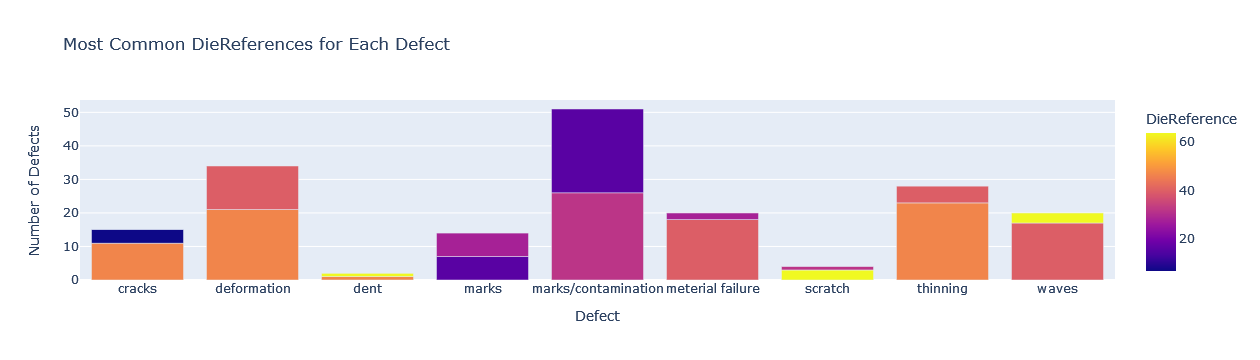

In [183]:
# Create the bar plot
fig = px.bar(most_common_dierefs, x="Defect", y="Number of Defects", color="DieReference",
             title="Most Common DieReferences for Each Defect")

# Customize the layout
fig.update_layout(xaxis_title="Defect", yaxis_title="Number of Defects", legend_title="DieReference")

# Show the plot
fig.show()

Let's deep dive into the **Defects.**

***Defects - Cracks***

Let's check the cracks for the most common reference: **DieReferece 47** and see what information we can retrieve.

In [184]:
# Filter the data for DieReference 47 and "cracks" defect
df_die_47_cracks = df[(df["DieReference"] == 47) & (df["Defect"] == "cracks")]
df_die_47_cracks.head(5)

TraceabilityCode time  AmbientHumidity  AmbientTemperature  \
104075  1010123011060454  NaT              NaN                 NaN   
104076  1010123011060503  NaT              NaN                 NaN   
104077  1010123011060512  NaT              NaN                 NaN   
104078  1010123011060521  NaT              NaN                 NaN   
104079  1010123011060529  NaT              NaN                 NaN   

        ClutchBrakeTemperatureUnitOil  ClutchBrakeWaterTemperature  \
104075                            NaN                          NaN   
104076                            NaN                          NaN   
104077                            NaN                          NaN   
104078                            NaN                          NaN   
104079                            NaN                          NaN   

        CushionPumpMaxPower1  CushionPumpMaxPower2  CushionPumpMaxPower3  \
104075                   NaN                   NaN                   NaN   
104076                   NaN                   NaN                   NaN   
104077                   NaN                   NaN                   NaN   
104078                   NaN                   NaN                   NaN   
104079                   NaN                   NaN                   NaN   

        CushionPumpMeanPower1  CushionPumpMeanPower2  CushionPumpMeanPower3  \
104075                    NaN                    NaN                    NaN   
104076                    NaN                    NaN                    NaN   
104077                    NaN                    NaN                    NaN   
104078                    NaN                    NaN                    NaN   
104079                    NaN                    NaN                    NaN   

        CushionTemperatureUnitOil  CushionWaterFlow  CushionWaterTemperature  \
104075                        NaN               NaN                      NaN   
104076                        NaN               NaN                      NaN   
104077                        NaN               NaN                      NaN   
104078                        NaN               NaN                      NaN   
104079                        NaN               NaN                      NaN   

        Cylinder1MaxForce  Cylinder1MaxParallelismInCycle  Cylinder2MaxForce  \
104075                NaN                             NaN                NaN   
104076                NaN                             NaN                NaN   
104077                NaN                             NaN                NaN   
104078                NaN                             NaN                NaN   
104079                NaN                             NaN                NaN   

        Cylinder2MaxParalelismErrorInBDC  Cylinder2MaxParallelismInCycle  \
104075                               NaN                             NaN   
104076                               NaN                             NaN   
104077                               NaN                             NaN   
104078                               NaN                             NaN   
104079                               NaN                             NaN   

        Cylinder3MaxForce  Cylinder3MaxParalelismErrorInBDC  \
104075                NaN                               NaN   
104076                NaN                               NaN   
104077                NaN                               NaN   
104078                NaN                               NaN   
104079                NaN                               NaN   

        Cylinder3MaxParallelismInCycle  Cylinder4MaxForce  \
104075                             NaN                NaN   
104076                             NaN                NaN   
104077                             NaN                NaN   
104078                             NaN                NaN   
104079                             NaN                NaN   

        Cylinder4MaxParalelismErrorInBDC  Cylinder4MaxParallelismInCy

We are going to calculate the mean of each column and compare it to the same DieReference without a defect to check wether there is a value that is clearly causing this defect.

In [185]:
# Filter the data for DieReference 47 and "cracks" defect
df_die_47_cracks = df[(df["DieReference"] == 47) & (df["Defect"] == "cracks")]

# Filter the data for DieReference 47 without the "cracks" defect
df_die_47_no_cracks = df[(df["DieReference"] == 47) & df["Defect"].isnull()]

# Calculate the mean for car parts with the "cracks" defect
mean_cracks = df_die_47_cracks.mean()

# Calculate the mean for car parts without the "cracks" defect
mean_no_cracks = df_die_47_no_cracks.mean()

# Calculate the mean ratio between car parts without "cracks" and with "cracks"
mean_ratio = mean_cracks / mean_no_cracks 

# Filter columns with mean ratio greater than 1
mean_ratio_greater_than_1 = mean_ratio[~np.isinf(mean_ratio) & (mean_ratio > 1)]

print("There are", len(mean_ratio_greater_than_1), "columns with a greater mean in marks defects")
print("---------------------------")
print("Top 10 columns")
mean_ratio_greater_than_1.nlargest(10)

There are 51 columns with a greater mean in marks defects
---------------------------
Top 10 columns


ProcessEnergy_03                      1.405004
ProcessEnergy_02                      1.307759
MaxOffCenteredLoadFR_03               1.251570
MaxForceRL_03                         1.243421
MaxOffCenteredLoadLR_03               1.237891
MaxForceRR_03                         1.215441
HELMGaugesControl_03                  1.191219
TotalMaxForce_03                      1.176881
OverloadSystemPrechargePressure_02    1.151250
PartEnergy_03                         1.151097
dtype: float64

For **DieReference** 47 with the defect cracks, **ProcessEnergy** for Press 3 and 2 are columns with 40% and 30% higher means in non defected carparts.

Let's check if this happened for the other most common car part in this defect: **DieReference 40**

In [186]:
# Filter the data for DieReference 40 and Defect "deformation"
df_40_deformation = df[(df["DieReference"] == 40) & (df["Defect"] == "deformation")]
df_40_deformation.head(5)

TraceabilityCode                    time  AmbientHumidity  \
10914  1010123016053507 2023-01-16 06:35:35.381            22.80   
19540  1010123020093615 2023-01-20 10:36:42.305            14.35   
19549  1010123020094756 2023-01-20 10:48:26.775            13.35   
19550  1010123020094803 2023-01-20 10:48:35.335            13.40   
19551  1010123020094810 2023-01-20 10:48:43.734            13.40   

       AmbientTemperature  ClutchBrakeTemperatureUnitOil  \
10914           25.281109                       50.48326   
19540           26.400000                       48.40000   
19549           25.281109                       50.48326   
19550           26.500000                       50.48326   
19551           26.600000                       51.30000   

       ClutchBrakeWaterTemperature  CushionPumpMaxPower1  \
10914                    30.744794                  51.0   
19540                    32.100000                  41.7   
19549                    32.600000                  46.2   
19550                    30.744794                  44.4   
19551                    30.744794                  42.6   

       CushionPumpMaxPower2  CushionPumpMaxPower3  CushionPumpMeanPower1  \
10914             54.300000             42.597359                   48.9   
19540             44.144417             42.597359                   40.1   
19549             49.200000             47.700000                   44.7   
19550             47.100000             45.600000                   42.7   
19551             45.300000             44.100000                   41.2   

       CushionPumpMeanPower2  CushionPumpMeanPower3  \
10914                   51.7              38.329757   
19540                   42.5              41.200000   
19549                   47.4              46.100000   
19550                   45.2              44.000000   
19551                   43.6              42.400000   

       CushionTemperatureUnitOil  CushionWaterFlow  CushionWaterTemperature  \
10914                  51.600000             329.4                28.800000   
19540                  59.600000             329.7                33.979799   
19549                  64.298608             330.4                35.500000   
19550                  64.300000             330.3                35.400000   
19551                  64.298608             329.6                35.500000   

       Cylinder1MaxForce  Cylinder1MaxParallelismInCycle  Cylinder2MaxForce  \
10914          91.500000                        5.322226          84.000000   
19540          91.200000                        5.500000          81.700000   
19549          90.300000                        5.600000          81.600000   
19550          94.133569                        5.500000          81.300000   
19551          90.900000                        5.322226          78.560327   

       Cylinder2MaxParalelismErrorInBDC  Cylinder2MaxParallelismInCycle  \
10914                          0.719963                        6.700000   
19540                          0.719963                        6.700000   
19549                          0.719963                        6.458434   
19550                          0.719963                        6.800000   
19551                          0.719963                        6.600000   

       Cylinder3MaxForce  Cylinder3MaxParalelismErrorInBDC  \
10914               83.9                            4.5263   
19540               91.5                            4.5263   
19549               92.0                            4.5263   
19550               92.4                            4.5263   
19551               92.6                            4.5263   

       Cylinder3MaxParallelismInCycle  Cylinder4MaxForce  \
10914                       10.419988               76.9   
19540                       10.600000               83.9   
19549                       10.800000               83.1   
19550                       10.700000               83.0   
19551         

Let's check the mean difference.

In [187]:
# Filter the data for DieReference 40 without the "deformation" defect
df_die_40_no_deformation = df[(df["DieReference"] == 40) & (df["Defect"].isnull())]

# Calculate the mean for car parts with the "deformation" defect
mean_deformation_40 = df_40_deformation.mean()

# Calculate the mean for car parts without the "deformation" defect
mean_no_deformation_40 = df_die_40_no_deformation.mean()

# Calculate the mean ratio
mean_ratio_deformation_40 =  mean_deformation_40 / mean_no_deformation_40

# Filter values larger than 1
mean_ratio_greater_than_1_deformation_40 = mean_ratio_deformation_40[~np.isinf(mean_ratio_deformation_40) & (mean_ratio_deformation_40 > 1)]


print("There are", len(mean_ratio_greater_than_1_deformation_40), "columns with a greater mean in deformation defects for DieReference 40")
print("---------------------------")
print("Top 10 columns")
print(mean_ratio_greater_than_1_deformation_40.nlargest(15))

There are 95 columns with a greater mean in deformation defects for DieReference 40
---------------------------
Top 10 columns
ProcessEnergy_04                      1.609428
MaxForceFR_03                         1.593757
Cylinder5MaxParalelismErrorInBDC      1.294828
MaxOffCenteredLoadLR_02               1.165021
Gear1MaxTorque_05                     1.125563
CushionPumpMaxPower1                  1.107621
CushionPumpMaxPower3                  1.093924
Cylinder7MaxForce                     1.093787
CushionPumpMaxPower2                  1.089250
CushionPumpMeanPower1                 1.081477
ProcessEnergy_02                      1.078053
ProcessEnergy_03                      1.075821
CushionPumpMeanPower2                 1.073978
OverloadSystemPrechargePressure_05    1.067833
MaxOffCenteredLoadLR_03               1.067570
dtype: float64


For this **DieReference**, the columns that seem to impact the most the **ProcessEnergy_04** are the **MaxForceFR_03** columns, with 60.94% to 59.37% greater mean values.

***Defect - Dent***

Let's focus on **DieRefence** number 47 to check if we can find the reason behind the **Defect** since it's the most common.

In [188]:
# Filter the data for DieReference 47 and Defect "deformation"
df_47_dent = df[(df["DieReference"] == 47) & (df["Defect"] == "dent")]
df_47_dent.head(5)

TraceabilityCode time  AmbientHumidity  AmbientTemperature  \
108491  1010123024133719  NaT              NaN                 NaN   

        ClutchBrakeTemperatureUnitOil  ClutchBrakeWaterTemperature  \
108491                            NaN                          NaN   

        CushionPumpMaxPower1  CushionPumpMaxPower2  CushionPumpMaxPower3  \
108491                   NaN                   NaN                   NaN   

        CushionPumpMeanPower1  CushionPumpMeanPower2  CushionPumpMeanPower3  \
108491                    NaN                    NaN                    NaN   

        CushionTemperatureUnitOil  CushionWaterFlow  CushionWaterTemperature  \
108491                        NaN               NaN                      NaN   

        Cylinder1MaxForce  Cylinder1MaxParallelismInCycle  Cylinder2MaxForce  \
108491                NaN                             NaN                NaN   

        Cylinder2MaxParalelismErrorInBDC  Cylinder2MaxParallelismInCycle  \
108491                               NaN                             NaN   

        Cylinder3MaxForce  Cylinder3MaxParalelismErrorInBDC  \
108491                NaN                               NaN   

        Cylinder3MaxParallelismInCycle  Cylinder4MaxForce  \
108491                             NaN                NaN   

        Cylinder4MaxParalelismErrorInBDC  Cylinder4MaxParallelismInCycle  \
108491                               NaN                             NaN   

        Cylinder5MaxForce  Cylinder5MaxParalelismErrorInBDC  \
108491                NaN                               NaN   

        Cylinder5MaxParallelismInCycle  Cylinder6MaxForce  \
108491                             NaN                NaN   

        Cylinder6MaxParalelismErrorInBDC  Cylinder6MaxParallelismInCycle  \
108491                               NaN                             NaN   

        Cylinder7MaxForce  Cylinder7MaxParalelismErrorInBDC  \
108491                NaN                               NaN   

        Cylinder7MaxParallelismInCycle  Cylinder8MaxForce  \
108491                             NaN                NaN   

        Cylinder8MaxParalelismErrorInBDC  Cylinder8MaxParallelismInCycle  \
108491                               NaN                             NaN   

        Gear1MaxTorque  Gear2MaxTorque  Gear3MaxTorque  HELMGaugesControl  \
108491             NaN             NaN             NaN                NaN   

        LubricationTemperatureUnitOil  MainMotorMaxPower  MainMotorMeanPower  \
108491                            NaN                NaN                 NaN   

        MaxForceFL  MaxForceFR  MaxForceRL  MaxForceRR  MaxOffCenteredLoadFR  \
108491         NaN         NaN         NaN         NaN                   NaN   

        MaxOffCenteredLoadLR  OverloadSystemPrechargePressure  PartEnergy  \
108491                   NaN                              NaN         NaN   

        PressForceValueFL  PressForceValueFR  PressForceValueRL  \
108491                NaN                NaN                NaN   

        PressForceValueRR  ProcessEnergy  SlideAccelerationDown  \
108491                NaN            NaN                    NaN   

        SlideAccelerationUp  SlidePositionDown  SlidePositionUp  \
108491                  NaN                NaN              NaN   

        SlideSpeedDown  SlideSpeedUp  TotalMaxForce  TotalPressForceValue  \
108491             NaN           NaN            NaN                   NaN   

                        time_02  ClutchBrakeTemperatureUnitOil_02  \
108491  2023-01-24 14:37:45.927                          50.73484   

        Gear1MaxTorque_02  Gear2MaxTorque_02  Gear3MaxTorque_02  \
108491           5.921861                7.2                6.6   

        HELMGaugesControl_02  LubricationTemperatureUnitOil_02  \
108491                   9.0                         25.267342   

        MainMotorMaxPower_02  MainMotorMeanPower_02  MaxForceFL_02  \
108491                  98.7                   41.3          

In [189]:
# Filter the data for DieReference 47 without the "dent" defect
df_die_47_no_dent = df[(df["DieReference"] == 47) & (df["Defect"].isnull())]

# Calculate the mean for car parts with the "dent" defect
mean_dent_47 = df_47_dent.mean()

# Calculate the mean for car parts without the "dent" defect
mean_no_dent_47 = df_die_47_no_dent.mean()

# Calculate the mean ratio
mean_ratio_dent_47 =  mean_dent_47 / mean_no_dent_47

# Filter values larger than 1
mean_ratio_greater_than_1_dent_47 = mean_ratio_dent_47[~np.isinf(mean_ratio_dent_47) & (mean_ratio_dent_47 > 1)]

print("There are", len(mean_ratio_greater_than_1_dent_47), "columns with a greater mean in dent defects for DieReference 47")
print("---------------------------")
print("Top 10 columns")
print(mean_ratio_greater_than_1_dent_47.nlargest(10))

There are 44 columns with a greater mean in dent defects for DieReference 47
---------------------------
Top 10 columns
MaxForceFL_03              4.307318
TotalMaxForce_03           3.640463
ProcessEnergy_03           2.349167
ProcessEnergy_02           2.032969
Gear1MaxTorque_03          1.824391
MaxOffCenteredLoadFR_02    1.312370
MaxOffCenteredLoadFR_06    1.274350
SlidePositionUp_02         1.256167
MaxForceFL_02              1.192501
MaxForceRR_06              1.177067
dtype: float64


**MaxForceFL** and **TotalMaxForce** for Press number 3 have on average 4.3x and 3.64x higher values than in non defected car parts.

***Defect - Marks***

Let's focus on **DieRefence** number 16 to check if we can find the reason behind the Defect since it's the most common.

In [190]:
# Filter the data for DieReference 16 and Defect "marks"
df_16_marks = df[(df["DieReference"] == 16) & (df["Defect"] == "marks")]
df_16_marks.head(5)

TraceabilityCode                    time  AmbientHumidity  \
4097   1010123010015403 2023-01-10 02:54:31.391        27.025000   
57181  1010223010063759 2023-01-10 07:43:11.868        26.483333   
57185  1010223010064317 2023-01-10 07:44:06.237        26.500000   
57190  1010223010064423 2023-01-10 07:44:51.687        26.500000   
57192  1010223010064441 2023-01-10 07:45:09.717        26.466667   

       AmbientTemperature  ClutchBrakeTemperatureUnitOil  \
4097            25.300000                           50.9   
57181           25.500000                           49.7   
57185           25.299297                           49.5   
57190           25.600000                           49.5   
57192           25.400000                           49.5   

       ClutchBrakeWaterTemperature  CushionPumpMaxPower1  \
4097                       30.8866             52.159087   
57181                      30.8866             52.800000   
57185                      30.2000             52.159087   
57190                      30.3000             52.159087   
57192                      30.5000             52.159087   

       CushionPumpMaxPower2  CushionPumpMaxPower3  CushionPumpMeanPower1  \
4097              55.147131             52.385811              49.272999   
57181             55.500000             52.385811              49.300000   
57185             55.147131             52.385811              49.400000   
57190             55.147131             52.385811              49.272999   
57192             55.147131             52.385811              49.200000   

       CushionPumpMeanPower2  CushionPumpMeanPower3  \
4097               51.950521                   32.0   
57181              52.100000                   38.2   
57185              51.950521                   30.5   
57190              51.900000                   37.8   
57192              51.950521                   40.1   

       CushionTemperatureUnitOil  CushionWaterFlow  CushionWaterTemperature  \
4097                   62.352351             324.2                34.400000   
57181                  63.900000             326.7                33.654201   
57185                  63.500000             325.6                33.300000   
57190                  62.352351             325.1                33.500000   
57192                  62.352351             325.4                33.600000   

       Cylinder1MaxForce  Cylinder1MaxParallelismInCycle  Cylinder2MaxForce  \
4097                62.8                        5.200000          65.458931   
57181               62.2                        5.171291          54.400000   
57185               62.6                        5.400000          54.900000   
57190               63.0                        5.000000          55.300000   
57192               62.7                        5.100000          55.100000   

       Cylinder2MaxParalelismErrorInBDC  Cylinder2MaxParallelismInCycle  \
4097                           0.927965                        6.249434   
57181                          0.927965                        6.100000   
57185                          0.927965                        6.300000   
57190                          0.927965                        6.249434   
57192                          0.927965                        6.249434   

       Cylinder3MaxForce  Cylinder3MaxParalelismErrorInBDC  \
4097                66.3                          4.764834   
57181               65.3                          4.764834   
57185               65.7                          4.764834   
57190               65.4                          4.764834   
57192               66.0                          4.764834   

       Cylinder3MaxParallelismInCycle  Cylinder4MaxForce  \
4097                         10.00000           53.83365   
57181                        10.11051           53.80000   
57185                        10.11051           54.40000   
57190                        10.11051           54.70000   
57192         

In [191]:
# Filter the data for DieReference 16 without the "marks" defect
df_die_16_no_marks = df[(df["DieReference"] == 16) & (df["Defect"].isnull())]

# Calculate the mean for car parts with the "marks" defect
mean_marks_16 = df_16_marks.mean()

# Calculate the mean for car parts without the "marks" defect
mean_no_marks_16 = df_die_16_no_marks.mean()

# Calculate the mean ratio
mean_ratio_marks_16 =  mean_marks_16 / mean_no_marks_16 

# Filter values larger than 1
mean_ratio_greater_than_1_marks_16 = mean_ratio_marks_16[~np.isinf(mean_ratio_marks_16) & (mean_ratio_marks_16> 1)]

print("There are", len(mean_ratio_greater_than_1_marks_16), "columns with a greater mean in marks defects for DieReference 16")
print("---------------------------")
print("Top 10 columns")
print(mean_ratio_greater_than_1_marks_16.nlargest(10))

There are 82 columns with a greater mean in marks defects for DieReference 16
---------------------------
Top 10 columns
ProcessEnergy_04           1.753405
PressForceValueFL_04       1.405271
MaxForceFR_03              1.270154
AmbientHumidity            1.219105
PressForceValueRR_02       1.162279
PressForceValueRL_02       1.148549
PressForceValueFR_02       1.147605
TotalPressForceValue_02    1.146705
PressForceValueFL_02       1.142480
MaxForceRR_03              1.093985
dtype: float64


**PressForceValue** and **TotalPressForceValue** for Press Number 3 are columns with much higher values with 2.58x the values in non faulty car parts.

Let's check if this happened for the second most common DieReference **DieReference - 28** to have this defect.

In [192]:
# Filter the data for DieReference 28 and Defect "marks"
df_28_marks = df[(df["DieReference"] == 28) & (df["Defect"] == "marks")]
df_28_marks.head(5)

TraceabilityCode                    time  AmbientHumidity  \
30157  1010123033051130 2023-02-02 06:11:46.082        21.366667   
30166  1010123033051233 2023-02-02 06:12:53.081        21.400000   
46411  1010123047132801 2023-02-16 14:28:22.951        18.400000   
57820  1010223010115854 2023-01-10 12:59:14.641        26.500000   
57822  1010223010115910 2023-01-10 12:59:29.451        26.533333   

       AmbientTemperature  ClutchBrakeTemperatureUnitOil  \
30157           25.300000                      48.468683   
30166           25.500000                      48.900000   
46411           26.500000                      48.468683   
57820           25.814551                      47.500000   
57822           25.800000                      47.600000   

       ClutchBrakeWaterTemperature  CushionPumpMaxPower1  \
30157                    30.800000             52.200000   
30166                    31.800000             49.200000   
46411                    30.361363             50.378816   
57820                    30.361363             50.378816   
57822                    30.361363             50.378816   

       CushionPumpMaxPower2  CushionPumpMaxPower3  CushionPumpMeanPower1  \
30157             55.200000             51.473549              48.400000   
30166             52.200000             51.000000              46.100000   
46411             53.291198             51.473549              47.242498   
57820             54.000000             51.473549              47.600000   
57822             53.291198             51.473549              47.242498   

       CushionPumpMeanPower2  CushionPumpMeanPower3  \
30157              51.200000              48.000000   
30166              48.700000              47.600000   
46411              51.800000              46.800000   
57820              49.924112              49.000000   
57822              50.600000              46.815677   

       CushionTemperatureUnitOil  CushionWaterFlow  CushionWaterTemperature  \
30157                  65.800000             330.3                34.700000   
30166                  65.700000             330.4                35.300000   
46411                  61.362346             324.9                33.403267   
57820                  58.400000             325.7                32.500000   
57822                  61.362346             324.8                33.403267   

       Cylinder1MaxForce  Cylinder1MaxParallelismInCycle  Cylinder2MaxForce  \
30157          73.400000                        8.700000               61.0   
30166          73.800000                        8.693138               61.4   
46411          73.200000                        8.693138               64.2   
57820          48.021378                        8.800000               24.3   
57822          33.200000                        8.693138               24.7   

       Cylinder2MaxParalelismErrorInBDC  Cylinder2MaxParallelismInCycle  \
30157                           1.00000                        9.600000   
30166                           1.19806                        9.600000   
46411                           0.90000                       10.019969   
57820                           1.19806                       10.500000   
57822                           1.19806                       10.300000   

       Cylinder3MaxForce  Cylinder3MaxParalelismErrorInBDC  \
30157               67.8                          5.000000   
30166               67.9                          5.272952   
46411               67.8                          5.272952   
57820               34.7                          5.272952   
57822               34.5                          5.272952   

       Cylinder3MaxParallelismInCycle  Cylinder4MaxForce  \
30157                       13.900000               65.3   
30166                       13.900000               65.4   
46411                       14.202076               64.4   
57820                       14.202076               27.0   
57822         

In [193]:
# Filter the data for DieReference 28 without the "marks" defect
df_die_28_no_marks = df[(df["DieReference"] == 28) & (df["Defect"].isnull())]

# Calculate the mean for car parts with the "marks" defect
mean_marks_28 = df_28_marks.mean()

# Calculate the mean for car parts without the "marks" defect
mean_no_marks_28 = df_die_28_no_marks.mean()

# Calculate the mean ratio
mean_ratio_marks_28 =  mean_marks_28 / mean_no_marks_28

# Filter values larger than 1
mean_ratio_greater_than_1_marks_28 = mean_ratio_marks_28[~np.isinf(mean_ratio_marks_28) & (mean_ratio_marks_28 > 1)]

print("There are", len(mean_ratio_greater_than_1_marks_28), "columns with a greater mean in marks defects for DieReference 28")
print("---------------------------")
print("Top 10 columns")
print(mean_ratio_greater_than_1_marks_28.nlargest(10))

There are 106 columns with a greater mean in marks defects for DieReference 28
---------------------------
Top 10 columns
PartEnergy_02                       2.074468
Cylinder6MaxParalelismErrorInBDC    1.460370
Gear2MaxTorque                      1.345597
Cylinder1MaxForce                   1.258277
ProcessEnergy                       1.229765
SlidePositionUp                     1.229431
Cylinder6MaxForce                   1.225204
PartEnergy                          1.223823
Cylinder2MaxForce                   1.220224
Cylinder7MaxForce                   1.213958
dtype: float64


**PartEnergy** values for Press 2 are 2x the regular value.

***Defect - Marks/Contamination***

Let's focus on **DieRefence** number 32 to check if we can find the reason behind the Defect since it's the most common.

In [194]:
# Filter the data for DieReference 32 and Defect "marks/contamination"
df_32_marks_contamination = df[(df["DieReference"] == 32) & (df["Defect"] == "marks/contamination")]
df_32_marks_contamination.head(5)

TraceabilityCode                    time  AmbientHumidity  \
25794  1010123030135130 2023-01-30 14:52:08.063           22.450   
25796  1010123030135152 2023-01-30 14:52:30.663           22.380   
25797  1010123030135204 2023-01-30 14:52:41.872           22.420   
25873  1010123030141720 2023-01-30 15:18:48.153           22.475   
25879  1010123030141917 2023-01-30 15:19:52.901           22.400   

       AmbientTemperature  ClutchBrakeTemperatureUnitOil  \
25794                22.6                           45.5   
25796                22.4                           45.6   
25797                22.5                           45.5   
25873                22.7                           46.3   
25879                22.7                           45.9   

       ClutchBrakeWaterTemperature  CushionPumpMaxPower1  \
25794                    27.500000             53.100000   
25796                    29.793151             52.800000   
25797                    27.400000             53.100000   
25873                    29.793151             52.800000   
25879                    28.800000             52.517766   

       CushionPumpMaxPower2  CushionPumpMaxPower3  CushionPumpMeanPower1  \
25794             55.800000              53.10000              51.139335   
25796             55.800000              52.23646              51.139335   
25797             55.422222              52.80000              52.000000   
25873             55.500000              52.80000              50.900000   
25879             55.422222              52.23646              51.400000   

       CushionPumpMeanPower2  CushionPumpMeanPower3  \
25794                   54.6                   23.2   
25796                   54.6                   21.3   
25797                   54.9                   18.4   
25873                   53.8                   37.0   
25879                   54.3                   30.3   

       CushionTemperatureUnitOil  CushionWaterFlow  CushionWaterTemperature  \
25794                  55.800000             328.5                32.924472   
25796                  56.000000             328.7                32.924472   
25797                  58.745537             329.3                30.800000   
25873                  58.745537             329.8                31.500000   
25879                  58.745537             329.0                32.400000   

       Cylinder1MaxForce  Cylinder1MaxParallelismInCycle  Cylinder2MaxForce  \
25794          64.500000                        5.648932           68.30000   
25796          64.700000                        5.648932           68.30000   
25797          65.000000                        5.648932           68.83996   
25873          64.506889                        5.648932           67.80000   
25879          64.800000                        5.500000           67.90000   

       Cylinder2MaxParalelismErrorInBDC  Cylinder2MaxParallelismInCycle  \
25794                          0.835106                        6.700000   
25796                          0.835106                        6.800000   
25797                          0.835106                        6.700000   
25873                          0.835106                        6.700000   
25879                          0.835106                        7.034314   

       Cylinder3MaxForce  Cylinder3MaxParalelismErrorInBDC  \
25794               74.7                          4.722785   
25796               73.6                          4.722785   
25797               74.1                          4.722785   
25873               73.1                          4.722785   
25879               73.9                          4.722785   

       Cylinder3MaxParallelismInCycle  Cylinder4MaxForce  \
25794                       11.057947          71.185234   
25796                       10.800000          71.400000   
25797                       11.057947          71.500000   
25873                       11.057947          71.300000   
25879         

In [195]:
# Filter the data for DieReference 32 without the "marks/contamination" defect
df_die_32_no_marks_contamination = df[(df["DieReference"] == 32) & (df["Defect"].isnull())]

# Calculate the mean for car parts with the "marks/contamination" defect
mean_marks_contamination_32 = df_32_marks_contamination.mean()

# Calculate the mean for car parts without the "marks/contamination" defect
mean_no_marks_contamination_32 = df_die_32_no_marks_contamination.mean()

# Calculate the mean ratio
mean_ratio_marks_contamination_32 = mean_marks_contamination_32 / mean_no_marks_contamination_32

# Filter values larger than 1
mean_ratio_greater_than_1_marks_contamination_32 = mean_ratio_marks_contamination_32[~np.isinf(mean_ratio_marks_contamination_32) & (mean_ratio_marks_contamination_32 > 1)]

print("There are", len(mean_ratio_greater_than_1_marks_contamination_32), "columns with a greater mean in marks/contamination defects for DieReference 32")
print("---------------------------")
print("Top 10 columns")
print(mean_ratio_greater_than_1_marks_contamination_32.nlargest(10))

There are 93 columns with a greater mean in marks/contamination defects for DieReference 32
---------------------------
Top 10 columns
ProcessEnergy_04           1.299070
ProcessEnergy_03           1.182764
CushionPumpMeanPower3      1.157758
MaxOffCenteredLoadFR_06    1.105703
MaxOffCenteredLoadFR_02    1.104444
MaxOffCenteredLoadLR_06    1.091252
MaxOffCenteredLoadLR_02    1.087706
HELMGaugesControl_02       1.055556
MaxForceFL_06              1.053303
SlidePositionDown_05       1.051018
dtype: float64


**ProcessEnergy** for Press number 3 and 4 are columns with inflated values. 

***Defect - Meterial Failure***

Let's focus on **DieRefence** number 40 to check if we can find the reason behind the Defect since it's the most common.

In [196]:
# Filter the data for DieReference 40 and Defect "meterial failure"
df_40_meterial_failure = df[(df["DieReference"] == 40) & (df["Defect"] == "meterial failure")]
df_40_meterial_failure.head(5)

TraceabilityCode                    time  AmbientHumidity  \
3032   1010123009142312 2023-01-09 15:23:39.183        28.183333   
11179  1010123016075118 2023-01-16 08:51:36.891        22.400000   
11181  1010123016075132 2023-01-16 08:51:53.931        22.400000   
11318  1010123016084207 2023-01-16 09:42:26.617        22.385714   
11319  1010123016084214 2023-01-16 09:42:35.177        22.250000   

       AmbientTemperature  ClutchBrakeTemperatureUnitOil  \
3032            24.100000                       51.10000   
11179           24.700000                       50.48326   
11181           24.700000                       50.80000   
11318           25.281109                       50.48326   
11319           24.800000                       50.48326   

       ClutchBrakeWaterTemperature  CushionPumpMaxPower1  \
3032                     30.744794                  42.3   
11179                    30.744794                  45.3   
11181                    30.744794                  42.0   
11318                    29.400000                  42.9   
11319                    29.300000                  41.4   

       CushionPumpMaxPower2  CushionPumpMaxPower3  CushionPumpMeanPower1  \
3032                   44.7                  43.5                   40.9   
11179                  48.0                  46.8                   43.8   
11181                  44.4                  43.2                   40.6   
11318                  45.6                  44.4                   41.6   
11319                  43.8                  42.3                   39.9   

       CushionPumpMeanPower2  CushionPumpMeanPower3  \
3032                    43.2                   42.1   
11179                   46.4                   45.1   
11181                   43.0                   41.7   
11318                   44.0                   42.8   
11319                   42.3                   41.1   

       CushionTemperatureUnitOil  CushionWaterFlow  CushionWaterTemperature  \
3032                   64.298608        327.860401                34.000000   
11179                  64.400000        331.300000                33.979799   
11181                  64.500000        331.900000                32.600000   
11318                  67.200000        331.800000                33.979799   
11319                  67.100000        333.300000                33.979799   

       Cylinder1MaxForce  Cylinder1MaxParallelismInCycle  Cylinder2MaxForce  \
3032           92.500000                        5.500000          80.100000   
11179          92.800000                        5.500000          78.560327   
11181          92.900000                        5.322226          79.200000   
11318          94.133569                        5.400000          77.900000   
11319          93.700000                        5.322226          77.600000   

       Cylinder2MaxParalelismErrorInBDC  Cylinder2MaxParallelismInCycle  \
3032                           0.800000                        6.458434   
11179                          0.719963                        6.458434   
11181                          0.719963                        6.500000   
11318                          0.719963                        6.600000   
11319                          0.719963                        6.458434   

       Cylinder3MaxForce  Cylinder3MaxParalelismErrorInBDC  \
3032                82.7                            4.5263   
11179              100.1                            4.5263   
11181              100.6                            4.5263   
11318               99.2                            4.5263   
11319               99.3                            4.5263   

       Cylinder3MaxParallelismInCycle  Cylinder4MaxForce  \
3032                        10.400000          77.200000   
11179                       10.419988          90.600000   
11181                       10.419988          85.158319   
11318                       10.419988          91.100000   
11319         

In [197]:
# Filter the data for DieReference 40 without the "meterial failure" defect
df_die_40_no_meterial_failure = df[(df["DieReference"] == 40) & (df["Defect"].isnull())]

# Calculate the mean for car parts with the "meterial failure" defect
mean_meterial_failure_40 = df_40_meterial_failure.mean()

# Calculate the mean for car parts without the "meterial failure" defect
mean_no_meterial_failure_40 = df_die_40_no_meterial_failure.mean()

# Calculate the mean ratio
mean_ratio_meterial_failure_40 = mean_meterial_failure_40 /  mean_no_meterial_failure_40

# Filter values larger than 1
mean_ratio_greater_than_1_meterial_failure_40 = mean_ratio_meterial_failure_40[~np.isinf(mean_ratio_meterial_failure_40) & (mean_ratio_meterial_failure_40 > 1)]

print("There are", len(mean_ratio_greater_than_1_meterial_failure_40), "columns with a greater mean in meterial failure defects for DieReference 40")
print("---------------------------")
print("Top 10 columns")
print(mean_ratio_greater_than_1_meterial_failure_40.nlargest(10))

There are 94 columns with a greater mean in meterial failure defects for DieReference 40
---------------------------
Top 10 columns
MaxForceFR_03                       1.593757
ProcessEnergy_03                    1.322988
SlideAccelerationDown               1.302593
AmbientHumidity                     1.173694
SlidePositionDown_03                1.126092
Cylinder8MaxParalelismErrorInBDC    1.113453
PressForceValueRR_02                1.113351
PressForceValueFL_02                1.112180
PressForceValueFR_02                1.107625
TotalPressForceValue_02             1.107296
dtype: float64


**MaxForce** and **ProcessEnergy** for Press Number 3 seem to have higher mean on defected DieReference 40.

***Defect - Scratch***

Let's focus on DieRefence number 64 to check if we can find the reason behind the Defect since it's the most common.

In [198]:
# Filter the data for DieReference 64 and Defect "scratch"
df_64_scratch = df[(df["DieReference"] == 64) & (df["Defect"] == "scratch")]
df_64_scratch.head(5)

TraceabilityCode time  AmbientHumidity  AmbientTemperature  \
132287  1010123024162930  NaT              NaN                 NaN   
132288  1010123024162939  NaT              NaN                 NaN   
132289  1010123024162948  NaT              NaN                 NaN   

        ClutchBrakeTemperatureUnitOil  ClutchBrakeWaterTemperature  \
132287                            NaN                          NaN   
132288                            NaN                          NaN   
132289                            NaN                          NaN   

        CushionPumpMaxPower1  CushionPumpMaxPower2  CushionPumpMaxPower3  \
132287                   NaN                   NaN                   NaN   
132288                   NaN                   NaN                   NaN   
132289                   NaN                   NaN                   NaN   

        CushionPumpMeanPower1  CushionPumpMeanPower2  CushionPumpMeanPower3  \
132287                    NaN                    NaN                    NaN   
132288                    NaN                    NaN                    NaN   
132289                    NaN                    NaN                    NaN   

        CushionTemperatureUnitOil  CushionWaterFlow  CushionWaterTemperature  \
132287                        NaN               NaN                      NaN   
132288                        NaN               NaN                      NaN   
132289                        NaN               NaN                      NaN   

        Cylinder1MaxForce  Cylinder1MaxParallelismInCycle  Cylinder2MaxForce  \
132287                NaN                             NaN                NaN   
132288                NaN                             NaN                NaN   
132289                NaN                             NaN                NaN   

        Cylinder2MaxParalelismErrorInBDC  Cylinder2MaxParallelismInCycle  \
132287                               NaN                             NaN   
132288                               NaN                             NaN   
132289                               NaN                             NaN   

        Cylinder3MaxForce  Cylinder3MaxParalelismErrorInBDC  \
132287                NaN                               NaN   
132288                NaN                               NaN   
132289                NaN                               NaN   

        Cylinder3MaxParallelismInCycle  Cylinder4MaxForce  \
132287                             NaN                NaN   
132288                             NaN                NaN   
132289                             NaN                NaN   

        Cylinder4MaxParalelismErrorInBDC  Cylinder4MaxParallelismInCycle  \
132287                               NaN                             NaN   
132288                               NaN                             NaN   
132289                               NaN                             NaN   

        Cylinder5MaxForce  Cylinder5MaxParalelismErrorInBDC  \
132287                NaN                               NaN   
132288                NaN                               NaN   
132289                NaN                               NaN   

        Cylinder5MaxParallelismInCycle  Cylinder6MaxForce  \
132287                             NaN                NaN   
132288                             NaN                NaN   
132289                             NaN                NaN   

        Cylinder6MaxParalelismErrorInBDC  Cylinder6MaxParallelismInCycle  \
132287                               NaN                             NaN   
132288                               NaN                             NaN   
132289                               NaN                             NaN   

        Cylinder7MaxForce  Cylinder7MaxParalelismErrorInBDC  \
132287                NaN                               NaN   
132288                NaN                               NaN   
132289                NaN                               NaN   

        Cylinder7M

In [199]:
# Filter the data for DieReference 64 without the "scratch" defect
df_die_64_no_scratch = df[(df["DieReference"] == 64) & (df["Defect"].isnull())]

# Calculate the mean for car parts with the "scratch" defect
mean_scratch_64 = df_64_scratch.mean()

# Calculate the mean for car parts without the "scratch" defect
mean_no_scratch_64 = df_die_64_no_scratch.mean()

# Calculate the mean ratio
mean_ratio_scratch_64 = mean_scratch_64 / mean_no_scratch_64

# Filter values larger than 1
mean_ratio_greater_than_1_scratch_64 = mean_ratio_scratch_64[~np.isinf(mean_ratio_scratch_64) & (mean_ratio_scratch_64 > 1)]

print("There are", len(mean_ratio_greater_than_1_scratch_64), "columns with a greater mean in scratch defects for DieReference 64")
print("---------------------------")
print("Top 10 columns")
print(mean_ratio_greater_than_1_scratch_64.nlargest(10))

There are 25 columns with a greater mean in scratch defects for DieReference 64
---------------------------
Top 10 columns
PartEnergy_03               2.174972
SlideSpeedUp_03             1.586408
Gear3MaxTorque_03           1.503734
Gear1MaxTorque_03           1.400246
SlidePositionUp_03          1.395748
Gear2MaxTorque_03           1.299833
SlideAccelerationDown_03    1.203332
MaxOffCenteredLoadFR_05     1.071331
HELMGaugesControl_05        1.063908
MainMotorMeanPower_05       1.059538
dtype: float64


**PartEnergy**, **SlideSpeedUp** values from Press03 seem to have a impact on the defect scratch.

***Defect - Thinning***

Let's focus on **DieRefence** number 47 to check if we can find the reason behind the Defect since it's the most common.

In [200]:
# Filter the data for DieReference 47 and Defect "thinning"
df_47_thinning = df[(df["DieReference"] == 47) & (df["Defect"] == "thinning")]
df_47_thinning.head(5)

TraceabilityCode time  AmbientHumidity  AmbientTemperature  \
104098  1010123011061358  NaT              NaN                 NaN   
104099  1010123011061409  NaT              NaN                 NaN   
104100  1010123011061527  NaT              NaN                 NaN   
104102  1010123011061542  NaT              NaN                 NaN   
104103  1010123011061550  NaT              NaN                 NaN   

        ClutchBrakeTemperatureUnitOil  ClutchBrakeWaterTemperature  \
104098                            NaN                          NaN   
104099                            NaN                          NaN   
104100                            NaN                          NaN   
104102                            NaN                          NaN   
104103                            NaN                          NaN   

        CushionPumpMaxPower1  CushionPumpMaxPower2  CushionPumpMaxPower3  \
104098                   NaN                   NaN                   NaN   
104099                   NaN                   NaN                   NaN   
104100                   NaN                   NaN                   NaN   
104102                   NaN                   NaN                   NaN   
104103                   NaN                   NaN                   NaN   

        CushionPumpMeanPower1  CushionPumpMeanPower2  CushionPumpMeanPower3  \
104098                    NaN                    NaN                    NaN   
104099                    NaN                    NaN                    NaN   
104100                    NaN                    NaN                    NaN   
104102                    NaN                    NaN                    NaN   
104103                    NaN                    NaN                    NaN   

        CushionTemperatureUnitOil  CushionWaterFlow  CushionWaterTemperature  \
104098                        NaN               NaN                      NaN   
104099                        NaN               NaN                      NaN   
104100                        NaN               NaN                      NaN   
104102                        NaN               NaN                      NaN   
104103                        NaN               NaN                      NaN   

        Cylinder1MaxForce  Cylinder1MaxParallelismInCycle  Cylinder2MaxForce  \
104098                NaN                             NaN                NaN   
104099                NaN                             NaN                NaN   
104100                NaN                             NaN                NaN   
104102                NaN                             NaN                NaN   
104103                NaN                             NaN                NaN   

        Cylinder2MaxParalelismErrorInBDC  Cylinder2MaxParallelismInCycle  \
104098                               NaN                             NaN   
104099                               NaN                             NaN   
104100                               NaN                             NaN   
104102                               NaN                             NaN   
104103                               NaN                             NaN   

        Cylinder3MaxForce  Cylinder3MaxParalelismErrorInBDC  \
104098                NaN                               NaN   
104099                NaN                               NaN   
104100                NaN                               NaN   
104102                NaN                               NaN   
104103                NaN                               NaN   

        Cylinder3MaxParallelismInCycle  Cylinder4MaxForce  \
104098                             NaN                NaN   
104099                             NaN                NaN   
104100                             NaN                NaN   
104102                             NaN                NaN   
104103                             NaN                NaN   

        Cylinder4MaxParalelismErrorInBDC  Cylinder4MaxParallelismInCy

In [201]:
# Filter the data for DieReference 47 without the "thinning" defect
df_die_47_no_thinning = df[(df["DieReference"] == 47) & (df["Defect"].isnull())]

# Calculate the mean for car parts with the "thinning" defect
mean_thinning_47 = df_47_thinning.mean()

# Calculate the mean for car parts without the "thinning" defect
mean_no_thinning_47 = df_die_47_no_thinning.mean()

# Calculate the mean ratio
mean_ratio_thinning_47 = mean_thinning_47 / mean_no_thinning_47

# Filter values larger than 1
mean_ratio_greater_than_1_thinning_47 = mean_ratio_thinning_47[~np.isinf(mean_ratio_thinning_47) & (mean_ratio_thinning_47 > 1)]

print("There are", len(mean_ratio_greater_than_1_thinning_47), "columns with a greater mean in thinning defects for DieReference 47")
print("---------------------------")
print("Top 10 columns")
print(mean_ratio_greater_than_1_thinning_47.nlargest(10))

There are 46 columns with a greater mean in thinning defects for DieReference 47
---------------------------
Top 10 columns
MaxForceRL_03                         1.221283
MaxOffCenteredLoadLR_03               1.203695
SlidePositionDown_02                  1.172954
MaxForceRR_06                         1.159389
PartEnergy_02                         1.156515
TotalMaxForce_03                      1.154398
SlideSpeedDown_02                     1.105313
OverloadSystemPrechargePressure_02    1.086653
ProcessEnergy_03                      1.078273
PressForceValueFL_06                  1.049610
dtype: float64


**MaxForce** and **MaxOffCenteredLoad** form Press number 3 seem to have higher mean in DieReference 47 with scratchs.

***Defect - Waves***

Let's focus on DieRefence number 40 to check if we can find the reason behind the Defect since it's the most common.

In [202]:
# Filter the data for DieReference 40 and Defect "waves"
df_40_waves = df[(df["DieReference"] == 40) & (df["Defect"] == "waves")]
df_40_waves.head(5)

TraceabilityCode                    time  AmbientHumidity  \
30926  1010123033090252 2023-02-02 10:04:15.976            22.40   
30927  1010123033090307 2023-02-02 10:04:37.934            22.40   
30928  1010123033090402 2023-02-02 10:04:48.134            22.35   
40809  1010123040232818 2023-02-10 00:29:38.713            11.35   
40810  1010123040232825 2023-02-10 00:32:19.341            11.35   

       AmbientTemperature  ClutchBrakeTemperatureUnitOil  \
30926                25.1                           47.5   
30927                24.9                           47.6   
30928                25.1                           47.9   
40809                25.1                           50.3   
40810                25.2                           50.1   

       ClutchBrakeWaterTemperature  CushionPumpMaxPower1  \
30926                         31.8                  52.5   
30927                         31.5                  53.1   
30928                         31.3                  52.2   
40809                         33.4                  51.6   
40810                         31.1                  52.2   

       CushionPumpMaxPower2  CushionPumpMaxPower3  CushionPumpMeanPower1  \
30926             54.300000                  51.0              50.900000   
30927             56.100000                  52.5              39.214656   
30928             54.300000                  50.7              50.700000   
40809             44.144417                  45.0              49.900000   
40810             55.200000                  52.2              45.900000   

       CushionPumpMeanPower2  CushionPumpMeanPower3  \
30926                   50.2                   15.7   
30927                   53.6                   35.1   
30928                   51.0                   15.7   
40809                   52.9                   18.3   
40810                   48.7                   45.2   

       CushionTemperatureUnitOil  CushionWaterFlow  CushionWaterTemperature  \
30926                       54.3             317.4                33.979799   
30927                       54.2             318.3                33.300000   
30928                       54.5             319.5                33.100000   
40809                       65.5             325.7                36.400000   
40810                       65.1             325.9                34.200000   

       Cylinder1MaxForce  Cylinder1MaxParallelismInCycle  Cylinder2MaxForce  \
30926               94.4                        5.300000               76.4   
30927               94.0                        5.322226               76.3   
30928               94.5                        5.322226               76.4   
40809               95.6                        5.600000               77.8   
40810               94.5                        5.300000               77.7   

       Cylinder2MaxParalelismErrorInBDC  Cylinder2MaxParallelismInCycle  \
30926                          0.719963                        6.600000   
30927                          0.719963                        6.458434   
30928                          0.719963                        6.700000   
40809                          0.719963                        6.700000   
40810                          0.719963                        6.500000   

       Cylinder3MaxForce  Cylinder3MaxParalelismErrorInBDC  \
30926              106.3                            4.5263   
30927              105.1                            4.5263   
30928              106.4                            4.5263   
40809               85.0                            4.5263   
40810               87.2                            4.4000   

       Cylinder3MaxParallelismInCycle  Cylinder4MaxForce  \
30926                            10.8              101.4   
30927                            10.7               99.8   
30928                            10.8              101.1   
40809                            10.4               77.3   
40810         

In [203]:
# Filter the data for DieReference 40 without the "waves" defect
df_die_40_no_waves = df[(df["DieReference"] == 40) & (df["Defect"].isnull())]

# Calculate the mean for car parts with the "waves" defect
mean_waves_40 = df_40_waves.mean()

# Calculate the mean for car parts without the "waves" defect
mean_no_waves_40 = df_die_40_no_waves.mean()

# Calculate the mean ratio
mean_ratio_waves_40 =  mean_waves_40 / mean_no_waves_40

# Filter values larger than 1
mean_ratio_greater_than_1_waves_40 = mean_ratio_waves_40[~np.isinf(mean_ratio_waves_40) & (mean_ratio_waves_40 > 1)]

print("There are", len(mean_ratio_greater_than_1_waves_40), "columns with a greater mean in waves defects for DieReference 40")
print("---------------------------")
print("Top 10 columns")
print(mean_ratio_greater_than_1_waves_40.nlargest(10))

There are 91 columns with a greater mean in waves defects for DieReference 40
---------------------------
Top 10 columns
PressForceValueFR_03                1.698324
PressForceValueFL_03                1.690067
PressForceValueRL_03                1.669290
TotalPressForceValue_03             1.662679
PressForceValueRR_03                1.643649
Cylinder7MaxParalelismErrorInBDC    1.531282
CushionPumpMeanPower2               1.178836
Cylinder4MaxParalelismErrorInBDC    1.176884
CushionPumpMaxPower1                1.176339
CushionPumpMeanPower1               1.168976
dtype: float64


**PressForceValue** and **TotalPressForceValue** seem to be inflated values coming from Press 02.

Let's check out of all of the analysed columns the most relevant ones.

In [204]:
# Concatenate the series into a single dataframe
mean_greater_than_1_col = pd.concat([
    mean_ratio_greater_than_1_waves_40,
    mean_ratio_greater_than_1_thinning_47,
    mean_ratio_greater_than_1_scratch_64,
    mean_ratio_greater_than_1_meterial_failure_40,
    mean_ratio_greater_than_1_marks_contamination_32,
    mean_ratio_greater_than_1_marks_28,
    mean_ratio_greater_than_1_marks_16,
    mean_ratio_greater_than_1_dent_47,
    mean_ratio_greater_than_1_deformation_40,
    mean_ratio_greater_than_1
])

# Filter out rows with 'inf' values
mean_greater_than_1_col = mean_greater_than_1_col[~np.isinf(mean_greater_than_1_col)]

# Display the filtered dataframe
mean_greater_than_1_col.nlargest(20)

MaxForceFL_03                       4.307318
TotalMaxForce_03                    3.640463
ProcessEnergy_03                    2.349167
PartEnergy_03                       2.174972
PartEnergy_02                       2.074468
ProcessEnergy_02                    2.032969
Gear1MaxTorque_03                   1.824391
ProcessEnergy_04                    1.753405
PressForceValueFR_03                1.698324
PressForceValueFL_03                1.690067
PressForceValueRL_03                1.669290
TotalPressForceValue_03             1.662679
PressForceValueRR_03                1.643649
ProcessEnergy_04                    1.609428
MaxForceFR_03                       1.593757
MaxForceFR_03                       1.593757
SlideSpeedUp_03                     1.586408
Cylinder7MaxParalelismErrorInBDC    1.531282
Gear3MaxTorque_03                   1.503734
Cylinder6MaxParalelismErrorInBDC    1.460370
dtype: float64

**PressForceValues**, **TotalMaxForce**, **ProcessEnergy** have clear higher values in defected car parts. Press Number 03 is the Press that seems to impact the Defects the most.

**AmbientHumidity**

Let's check if the distribution of **AmbientHumidity** and if it affects the **Defects Columns.**

In [205]:
df["AmbientHumidity"].describe()

count    101815.000000
mean         20.114809
std           4.287111
min          10.200000
25%          17.400000
50%          19.400000
75%          23.400000
max          29.533333
Name: AmbientHumidity, dtype: float64

Let's check the humidity over time.

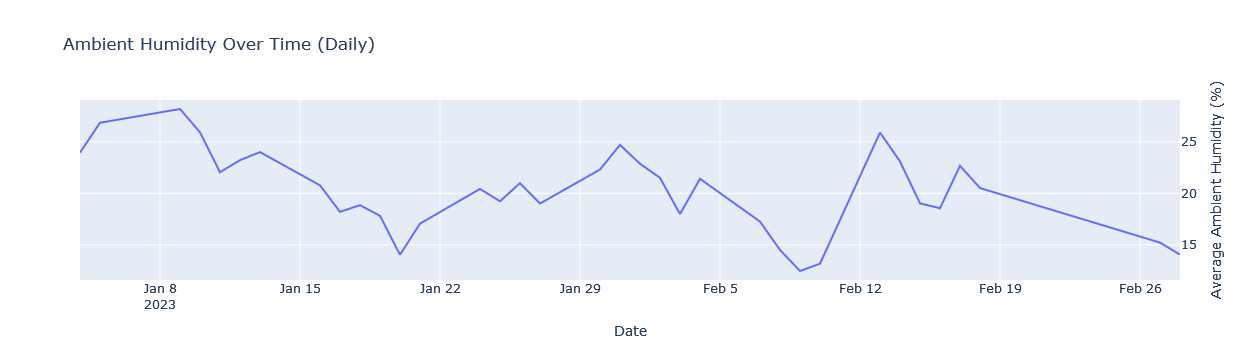

In [206]:
# Group the data by day
grouped_data = df.groupby(df["time"].dt.date).agg({"Defect": "count", "AmbientHumidity": "mean"}).reset_index()

# Create a figure
fig = go.Figure()

# Create a secondary y-axis for ambient humidity
fig.add_trace(go.Scatter(x=grouped_data["time"], y=grouped_data["AmbientHumidity"], name="Average Ambient Humidity", mode="lines", yaxis="y2"))

# Customize the layout
fig.update_layout(
    title="Ambient Humidity Over Time (Daily)",
    xaxis_title="Date",
    yaxis_title="Defect Count",
    yaxis2=dict(title="Average Ambient Humidity (%)", overlaying="y", side="right")
)

# Show the plot
fig.show()

**AmbientTemperature**

In [207]:
df["AmbientTemperature"].describe()

count    101815.000000
mean         25.435741
std           1.007146
min          18.725000
25%          24.800000
50%          25.400000
75%          25.900000
max          28.000000
Name: AmbientTemperature, dtype: float64

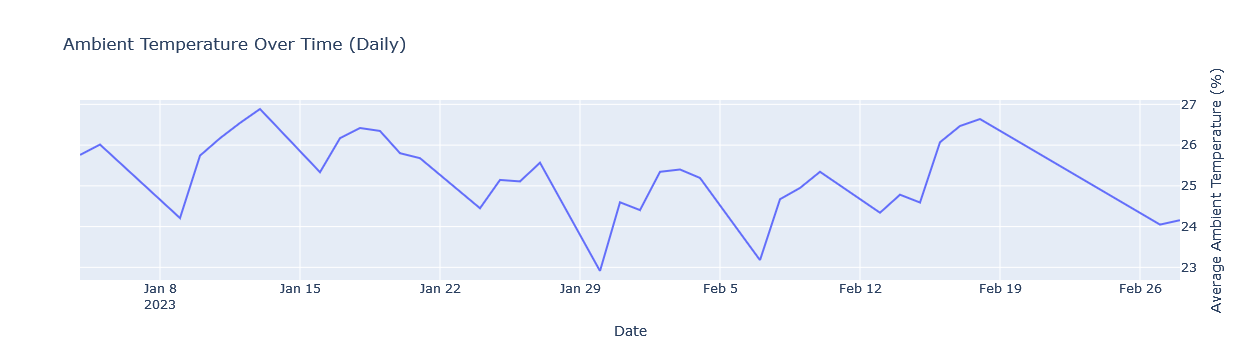

In [208]:
# Group the data by day
grouped_data_ambient = df.groupby(df["time"].dt.date).agg({"Defect": "count", "AmbientTemperature": "mean"}).reset_index()

# Create a figure
fig = go.Figure()

# Create a secondary y-axis for ambient temperature
fig.add_trace(go.Scatter(x=grouped_data_ambient["time"], y=grouped_data_ambient["AmbientTemperature"], name="Average Ambient Temperature", mode="lines", yaxis="y2"))

# Customize the layout
fig.update_layout(
    title="Ambient Temperature Over Time (Daily)",
    xaxis_title="Date",
    yaxis_title="Defect Count",
    yaxis2=dict(title="Average Ambient Temperature (%)", overlaying="y", side="right")
)

# Show the plot
fig.show()

Let's overlap the three line graphs see if we can draw any insights, regarding AmbientHumidity, AmbientTemperature and Defects.

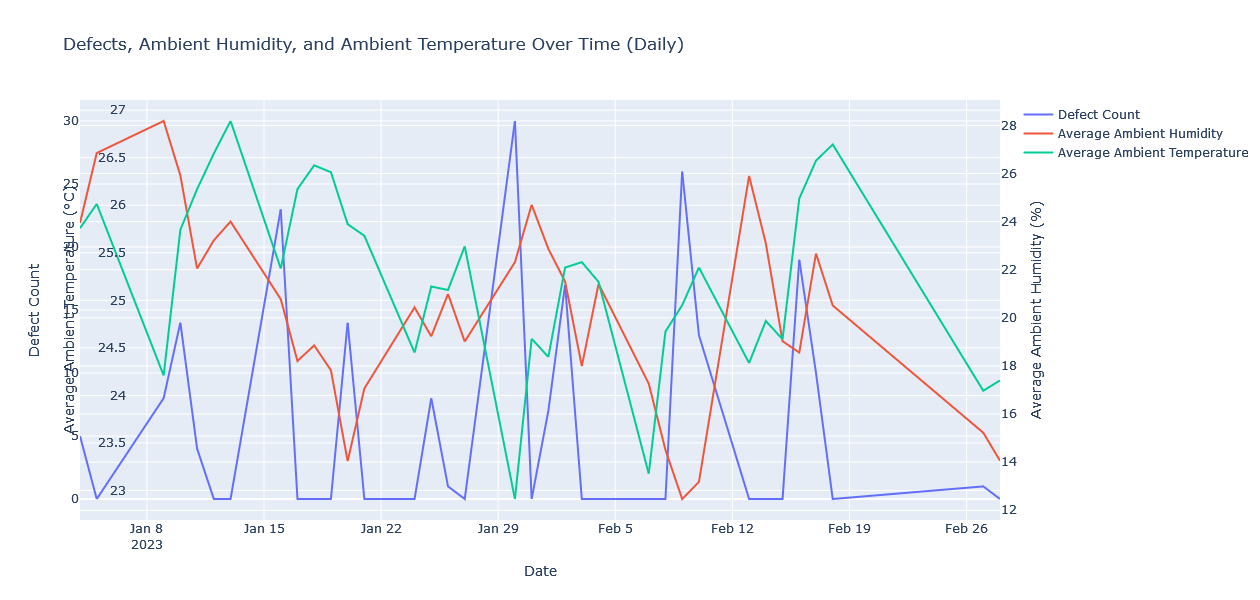

In [209]:
# Group the data by day
grouped_data_2 = df.groupby(df["time"].dt.date).agg({"Defect": "count", "AmbientHumidity": "mean", "AmbientTemperature": "mean"}).reset_index()

# Create a figure
fig = go.Figure()

# Add the Defect Count trace
fig.add_trace(go.Scatter(x=grouped_data_2["time"], y=grouped_data_2["Defect"], name="Defect Count", mode="lines"))

# Create a secondary y-axis for ambient humidity
fig.add_trace(go.Scatter(x=grouped_data_2["time"], y=grouped_data_2["AmbientHumidity"], name="Average Ambient Humidity", mode="lines", yaxis="y2"))

# Create a tertiary y-axis for ambient temperature
fig.add_trace(go.Scatter(x=grouped_data_2["time"], y=grouped_data_2["AmbientTemperature"], name="Average Ambient Temperature", mode="lines", yaxis="y3"))

# Customize the layout
fig.update_layout(
    title="Defects, Ambient Humidity, and Ambient Temperature Over Time (Daily)",
    xaxis_title="Date",
    yaxis_title="Defect Count",
    yaxis2=dict(title="Average Ambient Humidity (%)", overlaying="y", side="right"),
    yaxis3=dict(title="Average Ambient Temperature (°C)", overlaying="y", side="left", anchor="free", position=0.05),
    width=1300, 
    height=600   
)

# Show the plot
fig.show()

Defects, AmbientHumidity and AmbientTemperature doesn't seem to be correlated despite that the Day with the most Defects (January 30th, 2023), was the Day had the lowest average AmbientHumidity and a high average AmbientTemperature.

## **Feature Engeneering**

***press1, press2, press3, press4, press5, press6 columns***

First we are going to create 6 new columns indicating which of the presses that specific TraceabilityCode goes through.

In [210]:
# Create new columns for each press
for i in range(1, 7):
    time_col = "time" if i == 1 else f"time_{str(i).zfill(2)}"
    press_col = f"press{i}"
    # Check if the value is not NaN
    df[press_col] = df[time_col].notna().astype(int)

In [211]:
df.head(5)

TraceabilityCode                    time  AmbientHumidity  \
0  1010123004112008 2023-01-04 12:20:31.786        20.583333   
1  1010123004112015 2023-01-04 12:20:38.946        20.500000   
2  1010123004112023 2023-01-04 12:20:46.506        20.400000   
3  1010123004112030 2023-01-04 12:20:53.176        20.450000   
4  1010123004112038 2023-01-04 12:21:00.756        20.366667   

   AmbientTemperature  ClutchBrakeTemperatureUnitOil  \
0           25.344774                      54.935576   
1           25.344774                      54.935576   
2           25.344774                      54.935576   
3           25.500000                      51.000000   
4           25.344774                      54.935576   

   ClutchBrakeWaterTemperature  CushionPumpMaxPower1  CushionPumpMaxPower2  \
0                    31.518654             52.577394             55.519264   
1                    31.518654             52.577394             55.519264   
2                    31.518654             52.577394             55.519264   
3                    30.300000             52.577394             55.519264   
4                    31.518654             52.577394             55.519264   

   CushionPumpMaxPower3  CushionPumpMeanPower1  CushionPumpMeanPower2  \
0             52.385396              51.289236              52.231495   
1             52.385396              51.289236              52.231495   
2             52.385396              51.289236              52.231495   
3             52.385396              50.500000              52.231495   
4             52.385396              51.289236              52.231495   

   CushionPumpMeanPower3  CushionTemperatureUnitOil  CushionWaterFlow  \
0               5.100694                  57.997056        328.963565   
1               5.100694                  57.997056        328.963565   
2               5.100694                  57.997056        328.963565   
3               5.100694                  56.200000        327.300000   
4               5.100694                  57.997056        328.963565   

   CushionWaterTemperature  Cylinder1MaxForce  Cylinder1MaxParallelismInCycle  \
0                32.580519          74.136636                      -47.050183   
1                32.580519          74.136636                      -47.050183   
2                32.580519          74.136636                      -47.050183   
3                32.000000          73.300000                      -46.700000   
4                32.580519          74.136636                      -47.050183   

   Cylinder2MaxForce  Cylinder2MaxParalelismErrorInBDC  \
0          60.491694                          0.819691   
1          60.491694                          0.819691   
2          60.491694                          0.819691   
3          61.600000                          0.819691   
4          60.491694                          0.819691   

   Cylinder2MaxParallelismInCycle  Cylinder3MaxForce  \
0                      -46.116689          65.839439   
1                      -46.116689          65.839439   
2                      -46.116689          65.839439   
3                      -45.800000          65.839439   
4                      -46.116689          65.839439   

   Cylinder3MaxParalelismErrorInBDC  Cylinder3MaxParallelismInCycle  \
0                          4.534219                      -42.546183   
1                          4.534219                      -42.546183   
2                          4.534219                      -42.546183   
3                          4.534219                      -42.200000   
4                          4.534219                      -42.546183   

   Cylinder4MaxForce  Cylinder4MaxParalelismErrorInBDC  \
0          62.797733                         -0.222609   
1          62.797733                         -0.222609   
2          62.797733                         -0.222609   
3          63.200000                         -0.222609   
4          62.797733                        

***time_of_day column***

We are going to create some new variables in order to try to enhance the data in order to improve the prediction power of our models. 

Let's create two new variable, one that extracts the ***hour*** of the ***time*** column and another the puts the ***hour*** into a ***time of day*** category, such as morning or afternoon.

In [212]:
# Convert all time columns to datetime format
time_columns = ["time"] + [f"time_0{i}" for i in range(2, 7)]
for time_col in time_columns:
    df[time_col] = pd.to_datetime(df[time_col], errors='coerce')

# Extract the hour from the "time" column
df["hour"] = df["time"].dt.hour

# Define the bins and labels for the time of day categories
bins = [0, 6, 12, 18, 24]
labels = ["night", "morning", "afternoon", "evening"]

# Map the hour to the time of day categories using cut() and handle NaN
df["time_of_day_press1"] = pd.cut(df["hour"], bins=bins, labels=labels, right=False)
df["time_of_day_press1"] = np.where(df["time"].isna(), "not running", df["time_of_day_press1"])

# Repeat the process for the remaining time columns (time_02 to time_06)
for i in range(2, 7):
    column_name = f"time_0{i}"
    time_of_day_column = f"time_of_day_press{i}"
    # Use np.where to assign "not running" if the time is NaT (Not-a-Time)
    df[time_of_day_column] = np.where(df[column_name].isna(), "not running", pd.cut(df[column_name].dt.hour, bins=bins, labels=labels, right=False))

# Remove the intermediate "hour" column
df.drop("hour", axis=1, inplace=True)

In [214]:
df.head(1)

TraceabilityCode                    time  AmbientHumidity  \
0  1010123004112008 2023-01-04 12:20:31.786        20.583333   

   AmbientTemperature  ClutchBrakeTemperatureUnitOil  \
0           25.344774                      54.935576   

   ClutchBrakeWaterTemperature  CushionPumpMaxPower1  CushionPumpMaxPower2  \
0                    31.518654             52.577394             55.519264   

   CushionPumpMaxPower3  CushionPumpMeanPower1  CushionPumpMeanPower2  \
0             52.385396              51.289236              52.231495   

   CushionPumpMeanPower3  CushionTemperatureUnitOil  CushionWaterFlow  \
0               5.100694                  57.997056        328.963565   

   CushionWaterTemperature  Cylinder1MaxForce  Cylinder1MaxParallelismInCycle  \
0                32.580519          74.136636                      -47.050183   

   Cylinder2MaxForce  Cylinder2MaxParalelismErrorInBDC  \
0          60.491694                          0.819691   

   Cylinder2MaxParallelismInCycle  Cylinder3MaxForce  \
0                      -46.116689          65.839439   

   Cylinder3MaxParalelismErrorInBDC  Cylinder3MaxParallelismInCycle  \
0                          4.534219                      -42.546183   

   Cylinder4MaxForce  Cylinder4MaxParalelismErrorInBDC  \
0          62.797733                         -0.222609   

   Cylinder4MaxParallelismInCycle  Cylinder5MaxForce  \
0                      -47.055277          60.990169   

   Cylinder5MaxParalelismErrorInBDC  Cylinder5MaxParallelismInCycle  \
0                          0.106448                      -46.745712   

   Cylinder6MaxForce  Cylinder6MaxParalelismErrorInBDC  \
0          63.425736                         -0.048723   

   Cylinder6MaxParallelismInCycle  Cylinder7MaxForce  \
0                      -46.946183          63.290199   

   Cylinder7MaxParalelismErrorInBDC  Cylinder7MaxParallelismInCycle  \
0                         -0.024041                      -46.927997   

   Cylinder8MaxForce  Cylinder8MaxParalelismErrorInBDC  \
0          82.801276                          0.194801   

   Cylinder8MaxParallelismInCycle  Gear1MaxTorque  Gear2MaxTorque  \
0                      -46.533744       42.346964       34.089451   

   Gear3MaxTorque  HELMGaugesControl  LubricationTemperatureUnitOil  \
0       38.212286         105.605246                      32.315176   

   MainMotorMaxPower  MainMotorMeanPower  MaxForceFL  MaxForceFR  MaxForceRL  \
0         203.952148           167.82599   82.676932    60.41395   77.974692   

   MaxForceRR  MaxOffCenteredLoadFR  MaxOffCenteredLoadLR  \
0   78.360597             39.350026             38.803196   

   OverloadSystemPrechargePressure  PartEnergy  PressForceValueFL  \
0                       159.500116  148.789316          76.001164   

   PressForceValueFR  PressForceValueRL  PressForceValueRR  ProcessEnergy  \
0          75.995789          74.272886          71.457377       2.271339   

   SlideAccelerationDown  SlideAccelerationUp  SlidePositionDown  \
0             993.736528          2544.410308         -32.811458   

   SlidePositionUp  SlideSpeedDown  SlideSpeedUp  TotalMaxForce  \
0        15.439189     -318.798806    274.132048      74.802273   

   TotalPressForceValue                 time_02  \
0             74.439372 2023-01-04 12:20:40.676   

   ClutchBrakeTemperatureUnitOil_02  Gear1MaxTorque_02  Gear2MaxTorque_02  \
0                         55.010388                7.8               11.9   

   Gear3MaxTorque_02  HELMGaugesControl_02  LubricationTemperatureUnitOil_02  \
0                9.8                  53.6                              26.0   

   MainMotorMaxPower_02  MainMotorMeanPower_02  MaxForceFL_02  MaxForceFR_02  \
0                 152.1                   58.2           25.7           33.5   

   MaxForceRL_02  MaxForceRR_02  MaxOffCenteredLoadFR_02  \
0           41.0           31.7                     10.4   

   MaxOffCenteredLoadLR_02  OverloadSystemPrechargePressure_02  PartEnergy_02 

***humidity_category***

In [215]:
df["AmbientHumidity"].describe()

count    101815.000000
mean         20.114809
std           4.287111
min          10.200000
25%          17.400000
50%          19.400000
75%          23.400000
max          29.533333
Name: AmbientHumidity, dtype: float64

In [216]:
#Fill NaN Values with 0
df["AmbientHumidity"].fillna(0, inplace = True)

# Define the bins and labels for the humidity categories
bins = [0, 15, 20, 25, 30]
labels = ["Unknown", "Low", "Moderate", "High"]

# Map the humidity values to the categories using cut()
df["humidity_category"] = pd.cut(df["AmbientHumidity"], bins=bins, labels=labels, right=False, include_lowest = True)

df.head(1)

TraceabilityCode                    time  AmbientHumidity  \
0  1010123004112008 2023-01-04 12:20:31.786        20.583333   

   AmbientTemperature  ClutchBrakeTemperatureUnitOil  \
0           25.344774                      54.935576   

   ClutchBrakeWaterTemperature  CushionPumpMaxPower1  CushionPumpMaxPower2  \
0                    31.518654             52.577394             55.519264   

   CushionPumpMaxPower3  CushionPumpMeanPower1  CushionPumpMeanPower2  \
0             52.385396              51.289236              52.231495   

   CushionPumpMeanPower3  CushionTemperatureUnitOil  CushionWaterFlow  \
0               5.100694                  57.997056        328.963565   

   CushionWaterTemperature  Cylinder1MaxForce  Cylinder1MaxParallelismInCycle  \
0                32.580519          74.136636                      -47.050183   

   Cylinder2MaxForce  Cylinder2MaxParalelismErrorInBDC  \
0          60.491694                          0.819691   

   Cylinder2MaxParallelismInCycle  Cylinder3MaxForce  \
0                      -46.116689          65.839439   

   Cylinder3MaxParalelismErrorInBDC  Cylinder3MaxParallelismInCycle  \
0                          4.534219                      -42.546183   

   Cylinder4MaxForce  Cylinder4MaxParalelismErrorInBDC  \
0          62.797733                         -0.222609   

   Cylinder4MaxParallelismInCycle  Cylinder5MaxForce  \
0                      -47.055277          60.990169   

   Cylinder5MaxParalelismErrorInBDC  Cylinder5MaxParallelismInCycle  \
0                          0.106448                      -46.745712   

   Cylinder6MaxForce  Cylinder6MaxParalelismErrorInBDC  \
0          63.425736                         -0.048723   

   Cylinder6MaxParallelismInCycle  Cylinder7MaxForce  \
0                      -46.946183          63.290199   

   Cylinder7MaxParalelismErrorInBDC  Cylinder7MaxParallelismInCycle  \
0                         -0.024041                      -46.927997   

   Cylinder8MaxForce  Cylinder8MaxParalelismErrorInBDC  \
0          82.801276                          0.194801   

   Cylinder8MaxParallelismInCycle  Gear1MaxTorque  Gear2MaxTorque  \
0                      -46.533744       42.346964       34.089451   

   Gear3MaxTorque  HELMGaugesControl  LubricationTemperatureUnitOil  \
0       38.212286         105.605246                      32.315176   

   MainMotorMaxPower  MainMotorMeanPower  MaxForceFL  MaxForceFR  MaxForceRL  \
0         203.952148           167.82599   82.676932    60.41395   77.974692   

   MaxForceRR  MaxOffCenteredLoadFR  MaxOffCenteredLoadLR  \
0   78.360597             39.350026             38.803196   

   OverloadSystemPrechargePressure  PartEnergy  PressForceValueFL  \
0                       159.500116  148.789316          76.001164   

   PressForceValueFR  PressForceValueRL  PressForceValueRR  ProcessEnergy  \
0          75.995789          74.272886          71.457377       2.271339   

   SlideAccelerationDown  SlideAccelerationUp  SlidePositionDown  \
0             993.736528          2544.410308         -32.811458   

   SlidePositionUp  SlideSpeedDown  SlideSpeedUp  TotalMaxForce  \
0        15.439189     -318.798806    274.132048      74.802273   

   TotalPressForceValue                 time_02  \
0             74.439372 2023-01-04 12:20:40.676   

   ClutchBrakeTemperatureUnitOil_02  Gear1MaxTorque_02  Gear2MaxTorque_02  \
0                         55.010388                7.8               11.9   

   Gear3MaxTorque_02  HELMGaugesControl_02  LubricationTemperatureUnitOil_02  \
0                9.8                  53.6                              26.0   

   MainMotorMaxPower_02  MainMotorMeanPower_02  MaxForceFL_02  MaxForceFR_02  \
0                 152.1                   58.2           25.7           33.5   

   MaxForceRL_02  MaxForceRR_02  MaxOffCenteredLoadFR_02  \
0           41.0           31.7                     10.4   

   MaxOffCenteredLoadLR_02  OverloadSystemPrechargePressure_02  PartEnergy_02 

In [217]:
df.tail(1)

TraceabilityCode time  AmbientHumidity  AmbientTemperature  \
143759  1012623048222115  NaT              0.0                 NaN   

        ClutchBrakeTemperatureUnitOil  ClutchBrakeWaterTemperature  \
143759                            NaN                          NaN   

        CushionPumpMaxPower1  CushionPumpMaxPower2  CushionPumpMaxPower3  \
143759                   NaN                   NaN                   NaN   

        CushionPumpMeanPower1  CushionPumpMeanPower2  CushionPumpMeanPower3  \
143759                    NaN                    NaN                    NaN   

        CushionTemperatureUnitOil  CushionWaterFlow  CushionWaterTemperature  \
143759                        NaN               NaN                      NaN   

        Cylinder1MaxForce  Cylinder1MaxParallelismInCycle  Cylinder2MaxForce  \
143759                NaN                             NaN                NaN   

        Cylinder2MaxParalelismErrorInBDC  Cylinder2MaxParallelismInCycle  \
143759                               NaN                             NaN   

        Cylinder3MaxForce  Cylinder3MaxParalelismErrorInBDC  \
143759                NaN                               NaN   

        Cylinder3MaxParallelismInCycle  Cylinder4MaxForce  \
143759                             NaN                NaN   

        Cylinder4MaxParalelismErrorInBDC  Cylinder4MaxParallelismInCycle  \
143759                               NaN                             NaN   

        Cylinder5MaxForce  Cylinder5MaxParalelismErrorInBDC  \
143759                NaN                               NaN   

        Cylinder5MaxParallelismInCycle  Cylinder6MaxForce  \
143759                             NaN                NaN   

        Cylinder6MaxParalelismErrorInBDC  Cylinder6MaxParallelismInCycle  \
143759                               NaN                             NaN   

        Cylinder7MaxForce  Cylinder7MaxParalelismErrorInBDC  \
143759                NaN                               NaN   

        Cylinder7MaxParallelismInCycle  Cylinder8MaxForce  \
143759                             NaN                NaN   

        Cylinder8MaxParalelismErrorInBDC  Cylinder8MaxParallelismInCycle  \
143759                               NaN                             NaN   

        Gear1MaxTorque  Gear2MaxTorque  Gear3MaxTorque  HELMGaugesControl  \
143759             NaN             NaN             NaN                NaN   

        LubricationTemperatureUnitOil  MainMotorMaxPower  MainMotorMeanPower  \
143759                            NaN                NaN                 NaN   

        MaxForceFL  MaxForceFR  MaxForceRL  MaxForceRR  MaxOffCenteredLoadFR  \
143759         NaN         NaN         NaN         NaN                   NaN   

        MaxOffCenteredLoadLR  OverloadSystemPrechargePressure  PartEnergy  \
143759                   NaN                              NaN         NaN   

        PressForceValueFL  PressForceValueFR  PressForceValueRL  \
143759                NaN                NaN                NaN   

        PressForceValueRR  ProcessEnergy  SlideAccelerationDown  \
143759                NaN            NaN                    NaN   

        SlideAccelerationUp  SlidePositionDown  SlidePositionUp  \
143759                  NaN                NaN              NaN   

        SlideSpeedDown  SlideSpeedUp  TotalMaxForce  TotalPressForceValue  \
143759             NaN           NaN            NaN                   NaN   

       time_02  ClutchBrakeTemperatureUnitOil_02  Gear1MaxTorque_02  \
143759     NaT                               NaN                NaN   

        Gear2MaxTorque_02  Gear3MaxTorque_02  HELMGaugesControl_02  \
143759                NaN                NaN                   NaN   

        LubricationTemperatureUnitOil_02  MainMotorMaxPower_02  \
143759                               NaN                   NaN   

        MainMotorMeanPower_02  MaxForceFL_02  MaxForceFR_02  MaxForceRL_02  \
143759                    NaN            Na

***Absolute Maximum Force***

One of the potential features that can provide valuable insights into the data is the maximum force. This feature aims to capture the maximum force measurements across different cylinders or force sensors.

In [218]:
# Identify the columns representing maximum force
max_force_columns = [col for col in df.columns if "MaxForce" in col]

# Calculate the absolute maximum force
df["AbsoluteMaxForce"] = df[max_force_columns].max(axis=1)

# Fill any NaN values in the new column with 0
df["AbsoluteMaxForce"].fillna(0, inplace=True)

In [219]:
df.head(1)

TraceabilityCode                    time  AmbientHumidity  \
0  1010123004112008 2023-01-04 12:20:31.786        20.583333   

   AmbientTemperature  ClutchBrakeTemperatureUnitOil  \
0           25.344774                      54.935576   

   ClutchBrakeWaterTemperature  CushionPumpMaxPower1  CushionPumpMaxPower2  \
0                    31.518654             52.577394             55.519264   

   CushionPumpMaxPower3  CushionPumpMeanPower1  CushionPumpMeanPower2  \
0             52.385396              51.289236              52.231495   

   CushionPumpMeanPower3  CushionTemperatureUnitOil  CushionWaterFlow  \
0               5.100694                  57.997056        328.963565   

   CushionWaterTemperature  Cylinder1MaxForce  Cylinder1MaxParallelismInCycle  \
0                32.580519          74.136636                      -47.050183   

   Cylinder2MaxForce  Cylinder2MaxParalelismErrorInBDC  \
0          60.491694                          0.819691   

   Cylinder2MaxParallelismInCycle  Cylinder3MaxForce  \
0                      -46.116689          65.839439   

   Cylinder3MaxParalelismErrorInBDC  Cylinder3MaxParallelismInCycle  \
0                          4.534219                      -42.546183   

   Cylinder4MaxForce  Cylinder4MaxParalelismErrorInBDC  \
0          62.797733                         -0.222609   

   Cylinder4MaxParallelismInCycle  Cylinder5MaxForce  \
0                      -47.055277          60.990169   

   Cylinder5MaxParalelismErrorInBDC  Cylinder5MaxParallelismInCycle  \
0                          0.106448                      -46.745712   

   Cylinder6MaxForce  Cylinder6MaxParalelismErrorInBDC  \
0          63.425736                         -0.048723   

   Cylinder6MaxParallelismInCycle  Cylinder7MaxForce  \
0                      -46.946183          63.290199   

   Cylinder7MaxParalelismErrorInBDC  Cylinder7MaxParallelismInCycle  \
0                         -0.024041                      -46.927997   

   Cylinder8MaxForce  Cylinder8MaxParalelismErrorInBDC  \
0          82.801276                          0.194801   

   Cylinder8MaxParallelismInCycle  Gear1MaxTorque  Gear2MaxTorque  \
0                      -46.533744       42.346964       34.089451   

   Gear3MaxTorque  HELMGaugesControl  LubricationTemperatureUnitOil  \
0       38.212286         105.605246                      32.315176   

   MainMotorMaxPower  MainMotorMeanPower  MaxForceFL  MaxForceFR  MaxForceRL  \
0         203.952148           167.82599   82.676932    60.41395   77.974692   

   MaxForceRR  MaxOffCenteredLoadFR  MaxOffCenteredLoadLR  \
0   78.360597             39.350026             38.803196   

   OverloadSystemPrechargePressure  PartEnergy  PressForceValueFL  \
0                       159.500116  148.789316          76.001164   

   PressForceValueFR  PressForceValueRL  PressForceValueRR  ProcessEnergy  \
0          75.995789          74.272886          71.457377       2.271339   

   SlideAccelerationDown  SlideAccelerationUp  SlidePositionDown  \
0             993.736528          2544.410308         -32.811458   

   SlidePositionUp  SlideSpeedDown  SlideSpeedUp  TotalMaxForce  \
0        15.439189     -318.798806    274.132048      74.802273   

   TotalPressForceValue                 time_02  \
0             74.439372 2023-01-04 12:20:40.676   

   ClutchBrakeTemperatureUnitOil_02  Gear1MaxTorque_02  Gear2MaxTorque_02  \
0                         55.010388                7.8               11.9   

   Gear3MaxTorque_02  HELMGaugesControl_02  LubricationTemperatureUnitOil_02  \
0                9.8                  53.6                              26.0   

   MainMotorMaxPower_02  MainMotorMeanPower_02  MaxForceFL_02  MaxForceFR_02  \
0                 152.1                   58.2           25.7           33.5   

   MaxForceRL_02  MaxForceRR_02  MaxOffCenteredLoadFR_02  \
0           41.0           31.7                     10.4   

   MaxOffCenteredLoadLR_02  OverloadSystemPrechargePressure_02  PartEnergy_02 

***Total Maximum Force***

Let's create a column with the Total Maximum Force.

In [220]:
# Identify the columns representing maximum force
max_force_columns = [col for col in df.columns if "MaxForce" in col]

# Calculate the total maximum force
df["TotalMaxForce"] = df[max_force_columns].sum(axis=1)

# Fill any NaN values in the new column with 0
df["TotalMaxForce"].fillna(0, inplace=True)

***Total Press Force***

In [221]:
# Identify the columns representing total press force
max_force_columns = [col for col in df.columns if "TotalPressForce" in col]

# Calculate the total maximum force
df["TotalPressForce"] = df[max_force_columns].sum(axis=1)

# Fill any NaN values in the new column with 0
df["TotalPressForce"].fillna(0, inplace=True)

***Press Force FL/FR - RL/RR***

In [222]:
# Identify the columns representing total press force
max_press_force_columns = [col for col in df.columns if "PressForce" in col]

# Calculate the total maximum force
df["PressForce"] = df[max_press_force_columns].sum(axis=1)

# Fill any NaN values in the new column with 0
df["PressForce"].fillna(0, inplace=True)

***Average - Press Force FL/FR - RL/RR***

In [223]:
# Identify the columns representing total press force
mean_press_force_columns = [col for col in df.columns if "PressForce" in col]

# Calculate the total maximum force
df["Mean_PressForce"] = df[mean_press_force_columns].mean(axis=1)

# Fill any NaN values in the new column with 0
df["Mean_PressForce"].fillna(0, inplace=True)

***MaxTorque Difference***

In [224]:
# Identify the columns representing maximum torque
max_torque_columns = [col for col in df.columns if "MaxTorque" in col]

# Calculate the maximum torque difference
df["MaxTorqueDifference"] = np.abs(df[max_torque_columns].diff(axis=1).max(axis=1))

# Fill any NaN values in the new column with 0
df["MaxTorqueDifference"].fillna(0, inplace=True)

***Mean Power***

In [225]:
# Identify the columns representing mean power
mean_power_columns = [col for col in df.columns if "MeanPower" in col]

# Calculate the mean power
df["MeanPower"] = df[mean_power_columns].mean(axis=1)

# Fill any NaN values in the new column with 0
df["MeanPower"].fillna(0, inplace=True)

***Total Energy Consumption***

In [226]:
# Identify the columns representing energy consumption
energy_columns = [col for col in df.columns if "Energy" in col in col]

# Calculate the total energy consumption
df["TotalEnergyConsumption"] = df[energy_columns].sum(axis=1)

# Fill any NaN values in the new column with 0
df["TotalEnergyConsumption"].fillna(0, inplace=True)

***Average Oil Temperature***

In [227]:
# Identify the columns representing oil temperature
temperature_columns = [col for col in df.columns if "Temperature" in col and "Oil" in col]

# Calculate the average temperature of the oil
df["AverageTemperatureOil"] = df[temperature_columns].mean(axis=1)

# Fill any NaN values in the new column with 0
df["AverageTemperatureOil"].fillna(0, inplace=True)

***Max Oil Temperature***

In [228]:
# Identify the columns representing oil temperature
temperature_columns = [col for col in df.columns if "Temperature" in col and "Oil" in col]

# Calculate the average temperature of the oil
df["MaxTemperatureOil"] = df[temperature_columns].max(axis=1)

# Fill any NaN values in the new column with 0
df["MaxTemperatureOil"].fillna(0, inplace=True)

## **Data Preparation**

Since the NaN values in this case have a real-world meaning (i.e., absence of data due to not going through the press), one approach could be to impute the NaNs in a way that makes it clear that they represent a non-measurement. Therefore we are going to have 2 strategies to handle these values:

**Strategy 1: Handling NaN Values - Filling them with value 0**

Replace NaNs with 0 makes sense in our context and we can ensure that the models interpret this as the absence of data.

In [229]:
df_strat_1 = df.copy()

Let's remove unnecessary columns that won't provide value for our models. 

In [230]:
df_strat_1.drop(columns = ["time", "time_02", "time_03", "time_04", "time_05", "time_06"], inplace = True)

Finishing strategy 1, we are going to fill all of the NaN with a 0.

In [231]:
#Filling the NaN with 0
df_strat_1.fillna(0, inplace = True)

In [232]:
df_strat_1.isna().sum().nlargest(1)

TraceabilityCode    0
dtype: int64

**Strategy 2: Handling NaN Values - `IteractiveInputer`**

In [233]:
df_strat_2 = df.copy()

Let's remove unnecessary columns that won't provide value for our models, the same way the did for the Strategy 1.

In [234]:
df_strat_2.drop(columns = ["time", "time_02", "time_03", "time_04", "time_05", "time_06"], inplace = True)

Let's fill the rest of the DataFrame with the `IteractiveInputer`. The IterativeImputer is a suitable choice for imputing missing values in our numeric columns. It considers the relationships and patterns among the features in our dataset to estimate missing values, making it suitable for datasets with complex dependencies. Additionally, it takes into account the correlations between features, leading to more accurate imputations when there are strong correlations between different numeric columns.

In [235]:
df_strat_2

TraceabilityCode  AmbientHumidity  AmbientTemperature  \
0       1010123004112008        20.583333           25.344774   
1       1010123004112015        20.500000           25.344774   
2       1010123004112023        20.400000           25.344774   
3       1010123004112030        20.450000           25.500000   
4       1010123004112038        20.366667           25.344774   
...                  ...              ...                 ...   
143755  1012623040042446         0.000000                 NaN   
143756  1012623048044806         0.000000                 NaN   
143757  1012623048220650         0.000000                 NaN   
143758  1012623048221501         0.000000                 NaN   
143759  1012623048222115         0.000000                 NaN   

        ClutchBrakeTemperatureUnitOil  ClutchBrakeWaterTemperature  \
0                           54.935576                    31.518654   
1                           54.935576                    31.518654   
2                           54.935576                    31.518654   
3                           51.000000                    30.300000   
4                           54.935576                    31.518654   
...                               ...                          ...   
143755                            NaN                          NaN   
143756                            NaN                          NaN   
143757                            NaN                          NaN   
143758                            NaN                          NaN   
143759                            NaN                          NaN   

        CushionPumpMaxPower1  CushionPumpMaxPower2  CushionPumpMaxPower3  \
0                  52.577394             55.519264             52.385396   
1                  52.577394             55.519264             52.385396   
2                  52.577394             55.519264             52.385396   
3                  52.577394             55.519264             52.385396   
4                  52.577394             55.519264             52.385396   
...                      ...                   ...                   ...   
143755                   NaN                   NaN                   NaN   
143756                   NaN                   NaN                   NaN   
143757                   NaN                   NaN                   NaN   
143758                   NaN                   NaN                   NaN   
143759                   NaN                   NaN                   NaN   

        CushionPumpMeanPower1  CushionPumpMeanPower2  CushionPumpMeanPower3  \
0                   51.289236              52.231495               5.100694   
1                   51.289236              52.231495               5.100694   
2                   51.289236              52.231495               5.100694   
3                   50.500000              52.231495               5.100694   
4                   51.289236              52.231495               5.100694   
...                       ...                    ...                    ...   
143755                    NaN                    NaN                    NaN   
143756                    NaN                    NaN                    NaN   
143757                    NaN                    NaN                    NaN   
143758                    NaN                    NaN                    NaN   
143759                    NaN                    NaN                    NaN   

        CushionTemperatureUnitOil  CushionWaterFlow  CushionWaterTemperature  \
0                       57.997056        328.963565                32.580519   
1                       57.997056        328.963565                32.580519   
2                       57.997056        328.963565                32.580519   
3                       56.200000        327.300000                32.000000   
4                       57.997056        328.963565                32.580519   
...                           ...           

In [236]:
# List of numeric columns for imputation
numeric_columns = df_strat_2.select_dtypes(include=[np.number]).columns

# Create a dataframe with numeric columns for imputation
df_numeric = df_strat_2[numeric_columns]

# Create an instance of the imputer
imputer = IterativeImputer()

# Fit and transform the numeric data to impute missing values
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=numeric_columns)

# Combine the imputed numeric columns with the non-numeric columns
df_imputed = pd.concat([df_strat_2[df_strat_2.columns.difference(numeric_columns)], df_imputed], axis=1)

Let's fill the NaN values for the Defect columns.

In [237]:
df_imputed["Defect"].fillna(0, inplace = True)

In [238]:
df_imputed.dropna(inplace=True)

In [239]:
df_strat_2 = df_imputed.copy()

In [240]:
df_strat_2.head(5)

Defect humidity_category time_of_day_press1 time_of_day_press2  \
0      0          Moderate          afternoon          afternoon   
1      0          Moderate          afternoon          afternoon   
2      0          Moderate          afternoon          afternoon   
3      0          Moderate          afternoon          afternoon   
4      0          Moderate          afternoon          afternoon   

  time_of_day_press3 time_of_day_press4 time_of_day_press5 time_of_day_press6  \
0        not running        not running        not running        not running   
1        not running        not running        not running        not running   
2        not running        not running        not running        not running   
3        not running        not running        not running        not running   
4        not running        not running        not running        not running   

   TraceabilityCode  AmbientHumidity  AmbientTemperature  \
0      1.010123e+15        20.583333           25.344774   
1      1.010123e+15        20.500000           25.344774   
2      1.010123e+15        20.400000           25.344774   
3      1.010123e+15        20.450000           25.500000   
4      1.010123e+15        20.366667           25.344774   

   ClutchBrakeTemperatureUnitOil  ClutchBrakeWaterTemperature  \
0                      54.935576                    31.518654   
1                      54.935576                    31.518654   
2                      54.935576                    31.518654   
3                      51.000000                    30.300000   
4                      54.935576                    31.518654   

   CushionPumpMaxPower1  CushionPumpMaxPower2  CushionPumpMaxPower3  \
0             52.577394             55.519264             52.385396   
1             52.577394             55.519264             52.385396   
2             52.577394             55.519264             52.385396   
3             52.577394             55.519264             52.385396   
4             52.577394             55.519264             52.385396   

   CushionPumpMeanPower1  CushionPumpMeanPower2  CushionPumpMeanPower3  \
0              51.289236              52.231495               5.100694   
1              51.289236              52.231495               5.100694   
2              51.289236              52.231495               5.100694   
3              50.500000              52.231495               5.100694   
4              51.289236              52.231495               5.100694   

   CushionTemperatureUnitOil  CushionWaterFlow  CushionWaterTemperature  \
0                  57.997056        328.963565                32.580519   
1                  57.997056        328.963565                32.580519   
2                  57.997056        328.963565                32.580519   
3                  56.200000        327.300000                32.000000   
4                  57.997056        328.963565                32.580519   

   Cylinder1MaxForce  Cylinder1MaxParallelismInCycle  Cylinder2MaxForce  \
0          74.136636                      -47.050183          60.491694   
1          74.136636                      -47.050183          60.491694   
2          74.136636                      -47.050183          60.491694   
3          73.300000                      -46.700000          61.600000   
4          74.136636                      -47.050183          60.491694   

   Cylinder2MaxParalelismErrorInBDC  Cylinder2MaxParallelismInCycle  \
0                          0.819691                      -46.116689   
1                          0.819691                      -46.116689   
2                          0.819691                      -46.116689   
3                          0.819691                      -45.800000   
4                          0.819691                      -46.116689   

   Cylinder3MaxForce  Cylinder3MaxParalelismErrorInBDC  \
0          65.839439                          4.534219   
1          65.839439                 

**`StandardScaller`**

Standardizing the data is an important step in preparing data for machine learning algorithms, particularly when we are dealing with features that are measured in different units or have different scales, which is our case. Standardizing essentially involves rescaling the features so that they have a mean of 0 and a standard deviation of 1. 

In [241]:
df_strat_1.shape

(143742, 234)

`StandardScaller` - **Strategy 1**

In [242]:
# List of columns to exclude from scaling
exclude_cols = ["TraceabilityCode", "press1", "press2", "press3", "press4", "press5", "press6"]

# Select columns to be scaled
columns_to_scale = [col for col in df_strat_1.columns if (df_strat_1[col].dtype == 'float64' or df_strat_1[col].dtype == 'int64') and col not in exclude_cols]

# Scale the selected columns
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_strat_1[columns_to_scale])

# Create a DataFrame from the scaled features
scaled_df_1 = pd.DataFrame(scaled_features, columns=columns_to_scale).reset_index(drop=True)

# Reset index of columns that were not scaled
non_scaled = df_strat_1[df_strat_1.columns.difference(columns_to_scale)].reset_index(drop=True)

# Concatenate the DataFrame of scaled features with columns that were not scaled
final_df_1 = pd.concat([non_scaled, scaled_df_1], axis=1)

In [243]:
final_df_1

Defect  TraceabilityCode humidity_category  press1  press2  press3  \
0           0  1010123004112008          Moderate       1       1       0   
1           0  1010123004112015          Moderate       1       1       0   
2           0  1010123004112023          Moderate       1       1       0   
3           0  1010123004112030          Moderate       1       1       0   
4           0  1010123004112038          Moderate       1       1       0   
...       ...               ...               ...     ...     ...     ...   
143737      0  1012623040042446           Unknown       0       0       0   
143738      0  1012623048044806           Unknown       0       0       0   
143739      0  1012623048220650           Unknown       0       0       0   
143740      0  1012623048221501           Unknown       0       0       0   
143741      0  1012623048222115           Unknown       0       0       0   

        press4  press5  press6 time_of_day_press1 time_of_day_press2  \
0            0       0       0          afternoon          afternoon   
1            0       0       0          afternoon          afternoon   
2            0       0       0          afternoon          afternoon   
3            0       0       0          afternoon          afternoon   
4            0       0       0          afternoon          afternoon   
...        ...     ...     ...                ...                ...   
143737       0       0       1        not running        not running   
143738       0       0       1        not running        not running   
143739       0       0       1        not running        not running   
143740       0       0       1        not running        not running   
143741       0       0       1        not running        not running   

       time_of_day_press3 time_of_day_press4 time_of_day_press5  \
0             not running        not running        not running   
1             not running        not running        not running   
2             not running        not running        not running   
3             not running        not running        not running   
4             not running        not running        not running   
...                   ...                ...                ...   
143737        not running        not running        not running   
143738        not running        not running        not running   
143739        not running        not running        not running   
143740        not running        not running        not running   
143741        not running        not running        not running   

       time_of_day_press6  AmbientHumidity  AmbientTemperature  \
0             not running         0.644581            0.632148   
1             not running         0.636103            0.632148   
2             not running         0.625929            0.632148   
3             not running         0.631016            0.645539   
4             not running         0.622538            0.632148   
...                   ...              ...                 ...   
143737              night        -1.449539           -1.554157   
143738              night        -1.449539           -1.554157   
143739            evening        -1.449539           -1.554157   
143740            evening        -1.449539           -1.554157   
143741            evening        -1.449539           -1.554157   

        ClutchBrakeTemperatureUnitOil  ClutchBrakeWaterTemperature  \
0                            0.929913                     0.726755   
1                            0.929913                     0.726755   
2                            0.929913                     0.726755   
3                            0.752618                     0.638536   
4                            0.929913                     0.726755   
...                               ...                          ...   
143737                      -1.544895                    -1.554893   
143738                      -1.544895                    -1

`StandardScaller` - **Strategy 2**

In [244]:
# List of columns to exclude from scaling
exclude_cols = ["TraceabilityCode", "press1", "press2", "press3", "press4", "press5", "press6"]

# Select columns to be scaled
columns_to_scale_2 = [col for col in df_strat_2.columns if (df_strat_2[col].dtype == 'float64' or df_strat_2[col].dtype == 'int64') and col not in exclude_cols]

# Scale the selected columns
scaler = StandardScaler()
scaled_features_2 = scaler.fit_transform(df_strat_2[columns_to_scale_2])

# Create a DataFrame from the scaled features
scaled_df_2 = pd.DataFrame(scaled_features_2, columns=columns_to_scale_2).reset_index(drop=True)

# Reset index of columns that were not scaled
non_scaled_2 = df_strat_2[df_strat_2.columns.difference(columns_to_scale_2)].reset_index(drop=True)


# Concatenate the DataFrame of scaled features with columns that were not scaled
final_df_2 = pd.concat([non_scaled_2, scaled_df_2], axis=1)

In [245]:
final_df_2

Defect  TraceabilityCode humidity_category  press1  press2  press3  \
0           0      1.010123e+15          Moderate     1.0     1.0     0.0   
1           0      1.010123e+15          Moderate     1.0     1.0     0.0   
2           0      1.010123e+15          Moderate     1.0     1.0     0.0   
3           0      1.010123e+15          Moderate     1.0     1.0     0.0   
4           0      1.010123e+15          Moderate     1.0     1.0     0.0   
...       ...               ...               ...     ...     ...     ...   
143719      0      1.012623e+15           Unknown     0.0     0.0     0.0   
143720      0      1.012623e+15           Unknown     0.0     0.0     0.0   
143721      0      1.012623e+15           Unknown     0.0     0.0     0.0   
143722      0      1.012623e+15           Unknown     0.0     0.0     0.0   
143723      0      1.012623e+15           Unknown     0.0     0.0     0.0   

        press4  press5  press6 time_of_day_press1 time_of_day_press2  \
0          0.0     0.0     0.0          afternoon          afternoon   
1          0.0     0.0     0.0          afternoon          afternoon   
2          0.0     0.0     0.0          afternoon          afternoon   
3          0.0     0.0     0.0          afternoon          afternoon   
4          0.0     0.0     0.0          afternoon          afternoon   
...        ...     ...     ...                ...                ...   
143719     0.0     0.0     1.0        not running        not running   
143720     0.0     0.0     1.0        not running        not running   
143721     0.0     0.0     1.0        not running        not running   
143722     0.0     0.0     1.0        not running        not running   
143723     0.0     0.0     1.0        not running        not running   

       time_of_day_press3 time_of_day_press4 time_of_day_press5  \
0             not running        not running        not running   
1             not running        not running        not running   
2             not running        not running        not running   
3             not running        not running        not running   
4             not running        not running        not running   
...                   ...                ...                ...   
143719        not running        not running        not running   
143720        not running        not running        not running   
143721        not running        not running        not running   
143722        not running        not running        not running   
143723        not running        not running        not running   

       time_of_day_press6  AmbientHumidity  AmbientTemperature  \
0             not running         0.644588            0.376041   
1             not running         0.636110            0.376041   
2             not running         0.625936            0.376041   
3             not running         0.631023            0.501665   
4             not running         0.622545            0.376041   
...                   ...              ...                 ...   
143719              night        -1.449537           -1.534788   
143720          afternoon        -1.449537           -0.106357   
143721            evening        -1.449537           -0.696472   
143722          afternoon        -1.449537           -0.714549   
143723            morning        -1.449537           -0.674378   

        ClutchBrakeTemperatureUnitOil  ClutchBrakeWaterTemperature  \
0                            1.065256                     1.325347   
1                            1.065256                     1.325347   
2                            1.065256                     1.325347   
3                            0.801393                     0.002241   
4                            1.065256                     1.325347   
...                               ...                          ...   
143719                      -1.789366                     0.179011   
143720                      -1.879785                    -0

**`LabelEncoder`**

We are going to use Label encoding is used to transform categorical data into a numerical format that can be understood by machine learning algorithms. Since we created some categorical features this is a essential step.

`LabelEncoder` - **Strategy 1**

In [246]:
# Identify categorical columns
categorical_columns = final_df_1.select_dtypes(include=['object', 'category']).columns

# Remove the defects column from the list
categorical_columns = [col for col in categorical_columns if col != 'Defect']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in categorical_columns:
    final_df_1[column] = label_encoder.fit_transform(final_df_1[column])

final_df_1

Defect  TraceabilityCode  humidity_category  press1  press2  press3  \
0           0  1010123004112008                  2       1       1       0   
1           0  1010123004112015                  2       1       1       0   
2           0  1010123004112023                  2       1       1       0   
3           0  1010123004112030                  2       1       1       0   
4           0  1010123004112038                  2       1       1       0   
...       ...               ...                ...     ...     ...     ...   
143737      0  1012623040042446                  3       0       0       0   
143738      0  1012623048044806                  3       0       0       0   
143739      0  1012623048220650                  3       0       0       0   
143740      0  1012623048221501                  3       0       0       0   
143741      0  1012623048222115                  3       0       0       0   

        press4  press5  press6  time_of_day_press1  time_of_day_press2  \
0            0       0       0                   0                   0   
1            0       0       0                   0                   0   
2            0       0       0                   0                   0   
3            0       0       0                   0                   0   
4            0       0       0                   0                   0   
...        ...     ...     ...                 ...                 ...   
143737       0       0       1                   4                   4   
143738       0       0       1                   4                   4   
143739       0       0       1                   4                   4   
143740       0       0       1                   4                   4   
143741       0       0       1                   4                   4   

        time_of_day_press3  time_of_day_press4  time_of_day_press5  \
0                        4                   4                   4   
1                        4                   4                   4   
2                        4                   4                   4   
3                        4                   4                   4   
4                        4                   4                   4   
...                    ...                 ...                 ...   
143737                   4                   4                   4   
143738                   4                   4                   4   
143739                   4                   4                   4   
143740                   4                   4                   4   
143741                   4                   4                   4   

        time_of_day_press6  AmbientHumidity  AmbientTemperature  \
0                        4         0.644581            0.632148   
1                        4         0.636103            0.632148   
2                        4         0.625929            0.632148   
3                        4         0.631016            0.645539   
4                        4         0.622538            0.632148   
...                    ...              ...                 ...   
143737                   3        -1.449539           -1.554157   
143738                   3        -1.449539           -1.554157   
143739                   1        -1.449539           -1.554157   
143740                   1        -1.449539           -1.554157   
143741                   1        -1.449539           -1.554157   

        ClutchBrakeTemperatureUnitOil  ClutchBrakeWaterTemperature  \
0                            0.929913                     0.726755   
1                            0.929913                     0.726755   
2                            0.929913                     0.726755   
3                            0.752618                     0.638536   
4                            0.929913                     0.726755   
...                               ...                          ...   
143737                      -1.544895        

`LabelEncoder` - **Strategy 2**

In [247]:
# Identify categorical columns
categorical_columns = final_df_2.select_dtypes(include=['object', 'category']).columns

# Remove the defects column from the list
categorical_columns = [col for col in categorical_columns if col != 'Defect']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in categorical_columns:
    final_df_2[column] = label_encoder.fit_transform(final_df_2[column])

final_df_2

Defect  TraceabilityCode  humidity_category  press1  press2  press3  \
0           0      1.010123e+15                  2     1.0     1.0     0.0   
1           0      1.010123e+15                  2     1.0     1.0     0.0   
2           0      1.010123e+15                  2     1.0     1.0     0.0   
3           0      1.010123e+15                  2     1.0     1.0     0.0   
4           0      1.010123e+15                  2     1.0     1.0     0.0   
...       ...               ...                ...     ...     ...     ...   
143719      0      1.012623e+15                  3     0.0     0.0     0.0   
143720      0      1.012623e+15                  3     0.0     0.0     0.0   
143721      0      1.012623e+15                  3     0.0     0.0     0.0   
143722      0      1.012623e+15                  3     0.0     0.0     0.0   
143723      0      1.012623e+15                  3     0.0     0.0     0.0   

        press4  press5  press6  time_of_day_press1  time_of_day_press2  \
0          0.0     0.0     0.0                   0                   0   
1          0.0     0.0     0.0                   0                   0   
2          0.0     0.0     0.0                   0                   0   
3          0.0     0.0     0.0                   0                   0   
4          0.0     0.0     0.0                   0                   0   
...        ...     ...     ...                 ...                 ...   
143719     0.0     0.0     1.0                   4                   4   
143720     0.0     0.0     1.0                   4                   4   
143721     0.0     0.0     1.0                   4                   4   
143722     0.0     0.0     1.0                   4                   4   
143723     0.0     0.0     1.0                   4                   4   

        time_of_day_press3  time_of_day_press4  time_of_day_press5  \
0                        4                   4                   4   
1                        4                   4                   4   
2                        4                   4                   4   
3                        4                   4                   4   
4                        4                   4                   4   
...                    ...                 ...                 ...   
143719                   4                   4                   4   
143720                   4                   4                   4   
143721                   4                   4                   4   
143722                   4                   4                   4   
143723                   4                   4                   4   

        time_of_day_press6  AmbientHumidity  AmbientTemperature  \
0                        4         0.644588            0.376041   
1                        4         0.636110            0.376041   
2                        4         0.625936            0.376041   
3                        4         0.631023            0.501665   
4                        4         0.622545            0.376041   
...                    ...              ...                 ...   
143719                   3        -1.449537           -1.534788   
143720                   0        -1.449537           -0.106357   
143721                   1        -1.449537           -0.696472   
143722                   0        -1.449537           -0.714549   
143723                   2        -1.449537           -0.674378   

        ClutchBrakeTemperatureUnitOil  ClutchBrakeWaterTemperature  \
0                            1.065256                     1.325347   
1                            1.065256                     1.325347   
2                            1.065256                     1.325347   
3                            0.801393                     0.002241   
4                            1.065256                     1.325347   
...                               ...                          ...   
143719                      -1.789366        

**Principal Component Analysis - `PCA()`**

There are some correlations betweem the data so, probably the PCA is going to help us improve our model since we are going to maximize the variance of the variables. For this effect to be as relevant as posible, the variables need to be as correlated as posible.

`PCA` - **Strategy 1**

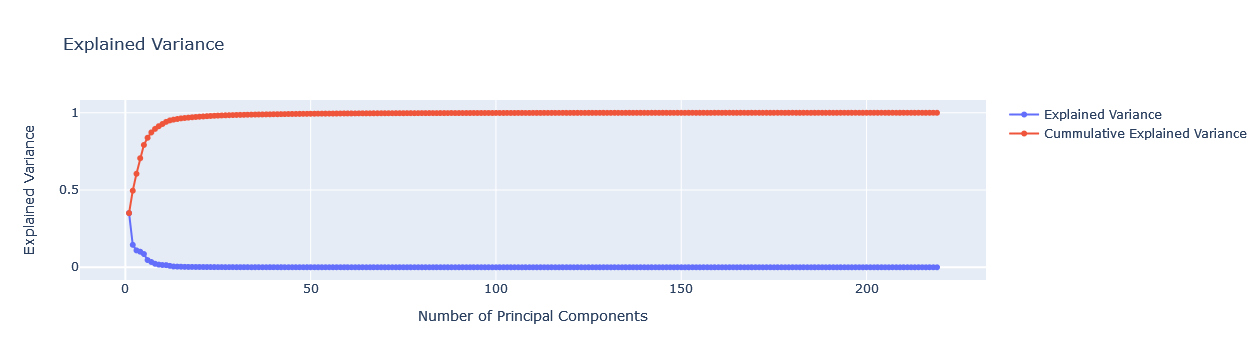

In [248]:
pca = PCA()

# PCA transformation
pca = PCA()
transformed_features = pca.fit_transform(scaled_df_1)

# plotly chart of explained variance
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=np.arange(1, len(pca.explained_variance_ratio_) + 1),
    y=pca.explained_variance_ratio_,
    mode="lines+markers",
    name="Explained Variance"
))
fig.add_trace(go.Scatter(
    x=np.arange(1, len(pca.explained_variance_ratio_) + 1),
    y=np.cumsum(pca.explained_variance_ratio_),
    mode="lines+markers",
    name="Cummulative Explained Variance"
))
fig.update_layout(title="Explained Variance", xaxis_title="Number of Principal Components", yaxis_title="Explained Variance")
fig.show()

With 10 PCA we capture 90% of the total variance of the data, so let's select only the first 10 PCA and create a DataFrame with the PCAs and all of the other columns.

In [249]:
# Create a DataFrame with the first 10 principal components
pca_df = pd.DataFrame(transformed_features, columns=[f'principal_component_{i+1}' for i in range(transformed_features.shape[1])])
pca_df = pca_df.iloc[:, :10]  # Keep only the first 10 principal components

# Create a DataFrame with the original columns that were not used in PCA transformation
original_columns = final_df_1.columns.difference(scaled_df_1.columns)
original_df = final_df_1[original_columns]

# Concatenate the PCA DataFrame with the original DataFrame
final_df_with_pca = pd.concat([original_df.reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)

In [250]:
final_df_with_pca.dropna(inplace=True)

In [251]:
final_df_with_pca

Defect  TraceabilityCode  humidity_category  press1  press2  press3  \
0           0  1010123004112008                  2       1       1       0   
1           0  1010123004112015                  2       1       1       0   
2           0  1010123004112023                  2       1       1       0   
3           0  1010123004112030                  2       1       1       0   
4           0  1010123004112038                  2       1       1       0   
...       ...               ...                ...     ...     ...     ...   
143737      0  1012623040042446                  3       0       0       0   
143738      0  1012623048044806                  3       0       0       0   
143739      0  1012623048220650                  3       0       0       0   
143740      0  1012623048221501                  3       0       0       0   
143741      0  1012623048222115                  3       0       0       0   

        press4  press5  press6  time_of_day_press1  time_of_day_press2  \
0            0       0       0                   0                   0   
1            0       0       0                   0                   0   
2            0       0       0                   0                   0   
3            0       0       0                   0                   0   
4            0       0       0                   0                   0   
...        ...     ...     ...                 ...                 ...   
143737       0       0       1                   4                   4   
143738       0       0       1                   4                   4   
143739       0       0       1                   4                   4   
143740       0       0       1                   4                   4   
143741       0       0       1                   4                   4   

        time_of_day_press3  time_of_day_press4  time_of_day_press5  \
0                        4                   4                   4   
1                        4                   4                   4   
2                        4                   4                   4   
3                        4                   4                   4   
4                        4                   4                   4   
...                    ...                 ...                 ...   
143737                   4                   4                   4   
143738                   4                   4                   4   
143739                   4                   4                   4   
143740                   4                   4                   4   
143741                   4                   4                   4   

        time_of_day_press6  principal_component_1  principal_component_2  \
0                        4              -2.372526              15.796803   
1                        4              -2.384237              15.745996   
2                        4              -2.355252              15.805668   
3                        4              -2.349698              15.671590   
4                        4              -2.371646              15.717784   
...                    ...                    ...                    ...   
143737                   3             -14.208460              -2.995979   
143738                   3             -15.608864              -1.329486   
143739                   1             -14.142202              -3.232755   
143740                   1             -14.165623              -3.241475   
143741                   1             -14.133816              -3.264880   

        principal_component_3  principal_component_4  principal_component_5  \
0                   11.310675               1.488840              -3.367358   
1                   11.340257               1.523139              -3.385233   
2                   11.288729               1.499949              -3.343938   
3                   11.395890               1.598111              -3.291985   
4                   11.341356   

`PCA` - **Strategy 2**

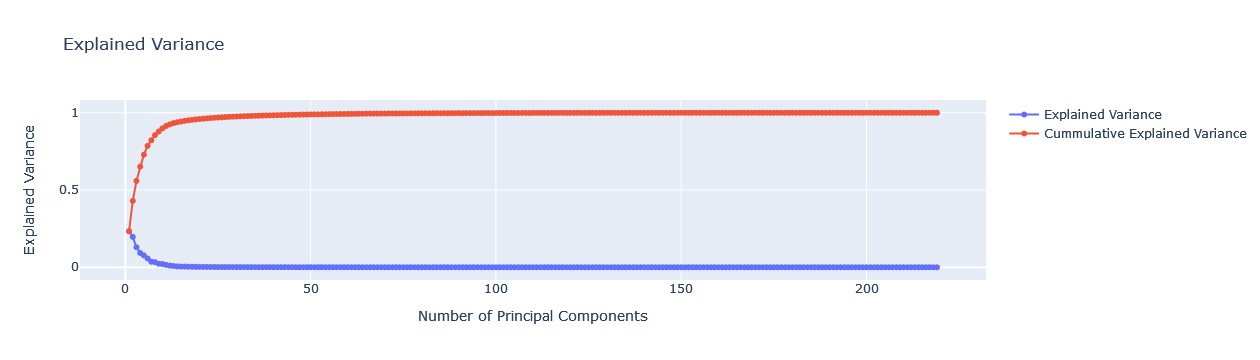

In [252]:
# PCA transformation
pca = PCA()
transformed_features_2 = pca.fit_transform(scaled_df_2)

# plotly chart of explained variance
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=np.arange(1, len(pca.explained_variance_ratio_) + 1),
    y=pca.explained_variance_ratio_,
    mode="lines+markers",
    name="Explained Variance"
))
fig.add_trace(go.Scatter(
    x=np.arange(1, len(pca.explained_variance_ratio_) + 1),
    y=np.cumsum(pca.explained_variance_ratio_),
    mode="lines+markers",
    name="Cummulative Explained Variance"
))
fig.update_layout(title="Explained Variance", xaxis_title="Number of Principal Components", yaxis_title="Explained Variance")
fig.show()

The same way we conclude with the Strategy 1, with 10 PCA we capture 90% of the total variance of the data, so let's select only the first 10 PCA and create a DataFrame with the PCAs and all of the other columns.

In [253]:
# Create a DataFrame with the first 10 principal components
pca_df_2 = pd.DataFrame(transformed_features_2, columns=[f'principal_component_{i+1}' for i in range(transformed_features_2.shape[1])])
pca_df_2 = pca_df_2.iloc[:, :10]  # Keep only the first 10 principal components

# Create a DataFrame with the original columns that were not used in PCA transformation
original_columns_2 = final_df_2.columns.difference(scaled_df_2.columns)
original_df_2 = final_df_2[original_columns_2]

# Concatenate the PCA DataFrame with the original DataFrame
final_df_with_pca_2 = pd.concat([original_df_2.reset_index(drop=True), pca_df_2.reset_index(drop=True)], axis=1)

In [254]:
final_df_with_pca_2

Defect  TraceabilityCode  humidity_category  press1  press2  press3  \
0           0      1.010123e+15                  2     1.0     1.0     0.0   
1           0      1.010123e+15                  2     1.0     1.0     0.0   
2           0      1.010123e+15                  2     1.0     1.0     0.0   
3           0      1.010123e+15                  2     1.0     1.0     0.0   
4           0      1.010123e+15                  2     1.0     1.0     0.0   
...       ...               ...                ...     ...     ...     ...   
143719      0      1.012623e+15                  3     0.0     0.0     0.0   
143720      0      1.012623e+15                  3     0.0     0.0     0.0   
143721      0      1.012623e+15                  3     0.0     0.0     0.0   
143722      0      1.012623e+15                  3     0.0     0.0     0.0   
143723      0      1.012623e+15                  3     0.0     0.0     0.0   

        press4  press5  press6  time_of_day_press1  time_of_day_press2  \
0          0.0     0.0     0.0                   0                   0   
1          0.0     0.0     0.0                   0                   0   
2          0.0     0.0     0.0                   0                   0   
3          0.0     0.0     0.0                   0                   0   
4          0.0     0.0     0.0                   0                   0   
...        ...     ...     ...                 ...                 ...   
143719     0.0     0.0     1.0                   4                   4   
143720     0.0     0.0     1.0                   4                   4   
143721     0.0     0.0     1.0                   4                   4   
143722     0.0     0.0     1.0                   4                   4   
143723     0.0     0.0     1.0                   4                   4   

        time_of_day_press3  time_of_day_press4  time_of_day_press5  \
0                        4                   4                   4   
1                        4                   4                   4   
2                        4                   4                   4   
3                        4                   4                   4   
4                        4                   4                   4   
...                    ...                 ...                 ...   
143719                   4                   4                   4   
143720                   4                   4                   4   
143721                   4                   4                   4   
143722                   4                   4                   4   
143723                   4                   4                   4   

        time_of_day_press6  principal_component_1  principal_component_2  \
0                        4               3.652751               3.248558   
1                        4               3.638838               3.372745   
2                        4               3.638382               3.511113   
3                        4               3.391437               3.856524   
4                        4               3.586167               3.532225   
...                    ...                    ...                    ...   
143719                   3              -7.568704               9.922393   
143720                   0              -6.188010               4.673193   
143721                   1              -7.531948               9.905629   
143722                   0              -7.555118               9.960633   
143723                   2              -7.461989               9.858508   

        principal_component_3  principal_component_4  principal_component_5  \
0                   11.847375               8.245786               8.858116   
1                   11.731598               8.231334               8.722945   
2                   11.683349               8.036421               8.543494   
3                   11.374473               7.847016               8.116274   
4                   11.592197   

## **Final Datasets**

In this section, we will create **8 distinct datasets** to train and evaluate our machine learning models. Our objective is to predict defects in car parts. To address this, we will develop two different types of predictive models:

1. **Binary Classification Model**: This model will predict whether a car part is defective or not. The output of this model is binary, where '0' indicates that the part is okay (OK), and '1' indicates that the part is not okay (NOK).

**Binary Classification Model - Strategy1: NaN values filled 0, `StandardScaler` and `LabelEncoder`**

Let's Model our 1st Final DataFrame with the final dataset created for Strategy 1 with StandardScaler and LabelEncoder.

In [255]:
final_df_1.head(5)

Defect  TraceabilityCode  humidity_category  press1  press2  press3  press4  \
0      0  1010123004112008                  2       1       1       0       0   
1      0  1010123004112015                  2       1       1       0       0   
2      0  1010123004112023                  2       1       1       0       0   
3      0  1010123004112030                  2       1       1       0       0   
4      0  1010123004112038                  2       1       1       0       0   

   press5  press6  time_of_day_press1  time_of_day_press2  time_of_day_press3  \
0       0       0                   0                   0                   4   
1       0       0                   0                   0                   4   
2       0       0                   0                   0                   4   
3       0       0                   0                   0                   4   
4       0       0                   0                   0                   4   

   time_of_day_press4  time_of_day_press5  time_of_day_press6  \
0                   4                   4                   4   
1                   4                   4                   4   
2                   4                   4                   4   
3                   4                   4                   4   
4                   4                   4                   4   

   AmbientHumidity  AmbientTemperature  ClutchBrakeTemperatureUnitOil  \
0         0.644581            0.632148                       0.929913   
1         0.636103            0.632148                       0.929913   
2         0.625929            0.632148                       0.929913   
3         0.631016            0.645539                       0.752618   
4         0.622538            0.632148                       0.929913   

   ClutchBrakeWaterTemperature  CushionPumpMaxPower1  CushionPumpMaxPower2  \
0                     0.726755              0.805635              0.804175   
1                     0.726755              0.805635              0.804175   
2                     0.726755              0.805635              0.804175   
3                     0.638536              0.805635              0.804175   
4                     0.726755              0.805635              0.804175   

   CushionPumpMaxPower3  CushionPumpMeanPower1  CushionPumpMeanPower2  \
0              0.774953               0.878418               0.814493   
1              0.774953               0.878418               0.814493   
2              0.774953               0.878418               0.814493   
3              0.774953               0.841614               0.814493   
4              0.774953               0.878418               0.814493   

   CushionPumpMeanPower3  CushionTemperatureUnitOil  CushionWaterFlow  \
0              -0.877607                   0.518755          0.653099   
1              -0.877607                   0.518755          0.653099   
2              -0.877607                   0.518755          0.653099   
3              -0.877607                   0.454582          0.641922   
4              -0.877607                   0.518755          0.653099   

   CushionWaterTemperature  Cylinder1MaxForce  Cylinder1MaxParallelismInCycle  \
0                 0.586594           0.701503                       -3.741774   
1                 0.586594           0.701503                       -3.741774   
2                 0.586594           0.701503                       -3.741774   
3                 0.548407           0.677956                       -3.714216   
4                 0.586594           0.701503                       -3.741774   

   Cylinder2MaxForce  Cylinder2MaxParalelismErrorInBDC  \
0           0.560385                          0.435932   
1           0.560385                          0.435932   
2           0.560385                          0.435932   
3           0.595405                          0.435932   
4           0.560385                          0.435932   

   Cylinder2Max

In [256]:
df_final_1 = final_df_1.copy()

Encoding the Defect column with our Binary Classification

In [257]:
#Encoding the Defect column
df_final_1["Defect"] = final_df_1["Defect"].apply(lambda x: 0 if x == 0 else 1)

Checking the distribution of the Defect column

In [258]:
df_final_1["Defect"].value_counts()

0    143451
1       291
Name: Defect, dtype: int64

In [259]:
df_final_1.head()

Defect  TraceabilityCode  humidity_category  press1  press2  press3  \
0       0  1010123004112008                  2       1       1       0   
1       0  1010123004112015                  2       1       1       0   
2       0  1010123004112023                  2       1       1       0   
3       0  1010123004112030                  2       1       1       0   
4       0  1010123004112038                  2       1       1       0   

   press4  press5  press6  time_of_day_press1  time_of_day_press2  \
0       0       0       0                   0                   0   
1       0       0       0                   0                   0   
2       0       0       0                   0                   0   
3       0       0       0                   0                   0   
4       0       0       0                   0                   0   

   time_of_day_press3  time_of_day_press4  time_of_day_press5  \
0                   4                   4                   4   
1                   4                   4                   4   
2                   4                   4                   4   
3                   4                   4                   4   
4                   4                   4                   4   

   time_of_day_press6  AmbientHumidity  AmbientTemperature  \
0                   4         0.644581            0.632148   
1                   4         0.636103            0.632148   
2                   4         0.625929            0.632148   
3                   4         0.631016            0.645539   
4                   4         0.622538            0.632148   

   ClutchBrakeTemperatureUnitOil  ClutchBrakeWaterTemperature  \
0                       0.929913                     0.726755   
1                       0.929913                     0.726755   
2                       0.929913                     0.726755   
3                       0.752618                     0.638536   
4                       0.929913                     0.726755   

   CushionPumpMaxPower1  CushionPumpMaxPower2  CushionPumpMaxPower3  \
0              0.805635              0.804175              0.774953   
1              0.805635              0.804175              0.774953   
2              0.805635              0.804175              0.774953   
3              0.805635              0.804175              0.774953   
4              0.805635              0.804175              0.774953   

   CushionPumpMeanPower1  CushionPumpMeanPower2  CushionPumpMeanPower3  \
0               0.878418               0.814493              -0.877607   
1               0.878418               0.814493              -0.877607   
2               0.878418               0.814493              -0.877607   
3               0.841614               0.814493              -0.877607   
4               0.878418               0.814493              -0.877607   

   CushionTemperatureUnitOil  CushionWaterFlow  CushionWaterTemperature  \
0                   0.518755          0.653099                 0.586594   
1                   0.518755          0.653099                 0.586594   
2                   0.518755          0.653099                 0.586594   
3                   0.454582          0.641922                 0.548407   
4                   0.518755          0.653099                 0.586594   

   Cylinder1MaxForce  Cylinder1MaxParallelismInCycle  Cylinder2MaxForce  \
0           0.701503                       -3.741774           0.560385   
1           0.701503                       -3.741774           0.560385   
2           0.701503                       -3.741774           0.560385   
3           0.677956                       -3.714216           0.595405   
4           0.701503                       -3.741774           0.560385   

   Cylinder2MaxParalelismErrorInBDC  Cylinder2MaxParallelismInCycle  \
0                          0.435932                       -3.689142   
1                          0.435932                       -3.689142   
2

Let's see the shape of our First Final DataFrame.

In [260]:
print(df_final_1.shape)

(143742, 234)


**Binary Classification Model - Strategy 1: NaN values filled 0, `StandardScaler`, `LabelEncoder` and `PCA`**

Let's Model our 2nd Final DataFrame with the final dataset created for Strategy 2 with the data StandardScaled, LabelEncoded and with PCA.

In [261]:
final_df_with_pca.head(5)

Defect  TraceabilityCode  humidity_category  press1  press2  press3  press4  \
0      0  1010123004112008                  2       1       1       0       0   
1      0  1010123004112015                  2       1       1       0       0   
2      0  1010123004112023                  2       1       1       0       0   
3      0  1010123004112030                  2       1       1       0       0   
4      0  1010123004112038                  2       1       1       0       0   

   press5  press6  time_of_day_press1  time_of_day_press2  time_of_day_press3  \
0       0       0                   0                   0                   4   
1       0       0                   0                   0                   4   
2       0       0                   0                   0                   4   
3       0       0                   0                   0                   4   
4       0       0                   0                   0                   4   

   time_of_day_press4  time_of_day_press5  time_of_day_press6  \
0                   4                   4                   4   
1                   4                   4                   4   
2                   4                   4                   4   
3                   4                   4                   4   
4                   4                   4                   4   

   principal_component_1  principal_component_2  principal_component_3  \
0              -2.372526              15.796803              11.310675   
1              -2.384237              15.745996              11.340257   
2              -2.355252              15.805668              11.288729   
3              -2.349698              15.671590              11.395890   
4              -2.371646              15.717784              11.341356   

   principal_component_4  principal_component_5  principal_component_6  \
0               1.488840              -3.367358              -2.266346   
1               1.523139              -3.385233              -2.270848   
2               1.499949              -3.343938              -2.262685   
3               1.598111              -3.291985              -2.232350   
4               1.562416              -3.366180              -2.278680   

   principal_component_7  principal_component_8  principal_component_9  \
0               3.450358               3.779733               1.951089   
1               3.386585               3.820282               1.966617   
2               3.410963               3.835166               1.930872   
3               3.390465               3.720587               1.854141   
4               3.343577               3.858842               1.945385   

   principal_component_10  
0                0.415047  
1                0.412350  
2                0.439191  
3                0.373044  
4                0.424160

In [262]:
df_final_2 = final_df_with_pca.copy()

Encoding the Defect Column with our Binary classification.

In [263]:
#Encoding the Defect columns
df_final_2["Defect"] = final_df_with_pca["Defect"].apply(lambda x: 0 if x == 0 else 1)

In [264]:
df_final_2["Defect"].value_counts()

0    143451
1       291
Name: Defect, dtype: int64

In [265]:
df_final_2.head(5)

Defect  TraceabilityCode  humidity_category  press1  press2  press3  \
0       0  1010123004112008                  2       1       1       0   
1       0  1010123004112015                  2       1       1       0   
2       0  1010123004112023                  2       1       1       0   
3       0  1010123004112030                  2       1       1       0   
4       0  1010123004112038                  2       1       1       0   

   press4  press5  press6  time_of_day_press1  time_of_day_press2  \
0       0       0       0                   0                   0   
1       0       0       0                   0                   0   
2       0       0       0                   0                   0   
3       0       0       0                   0                   0   
4       0       0       0                   0                   0   

   time_of_day_press3  time_of_day_press4  time_of_day_press5  \
0                   4                   4                   4   
1                   4                   4                   4   
2                   4                   4                   4   
3                   4                   4                   4   
4                   4                   4                   4   

   time_of_day_press6  principal_component_1  principal_component_2  \
0                   4              -2.372526              15.796803   
1                   4              -2.384237              15.745996   
2                   4              -2.355252              15.805668   
3                   4              -2.349698              15.671590   
4                   4              -2.371646              15.717784   

   principal_component_3  principal_component_4  principal_component_5  \
0              11.310675               1.488840              -3.367358   
1              11.340257               1.523139              -3.385233   
2              11.288729               1.499949              -3.343938   
3              11.395890               1.598111              -3.291985   
4              11.341356               1.562416              -3.366180   

   principal_component_6  principal_component_7  principal_component_8  \
0              -2.266346               3.450358               3.779733   
1              -2.270848               3.386585               3.820282   
2              -2.262685               3.410963               3.835166   
3              -2.232350               3.390465               3.720587   
4              -2.278680               3.343577               3.858842   

   principal_component_9  principal_component_10  
0               1.951089                0.415047  
1               1.966617                0.412350  
2               1.930872                0.439191  
3               1.854141                0.373044  
4               1.945385                0.424160

Checking the 2nd Final DataFrame shape.

In [266]:
print(df_final_2.shape)

(143742, 25)


**Binary Classification Model - Strategy 2: `IteractiveInputer`, `StandardScaler` and `LabelEncoder`**

Let's Model our 3rd Final DataFrame with the final dataset created for Strategy 2 with StandardScaler and LabelEncoder.

In [267]:
df_final_3 = final_df_2.copy()

Encoding our Defects column with our Binary Classification.

In [268]:
#Encoding the Defect columns
df_final_3["Defect"] = final_df_2["Defect"].apply(lambda x: 0 if x == 0 else 1)

In [269]:
df_final_3["Defect"].value_counts()

0    143433
1       291
Name: Defect, dtype: int64

Checking the 3rd Final DataFrame shape.

In [270]:
print(df_final_3.shape)

(143724, 234)


**Binary Classification Model - Strategy 2: `IteractiveInputer`, `StandardScaler`, `LabelEncoder` and `PCA`** 

Let's Model our 4rd Final DataFrame with the DataFrame shaped for Strategy 2 with IteractiveInputer, StandardScaler, LabelEncoder and PCA.

In [271]:
df_final_4 = final_df_with_pca_2.copy()
df_final_4

Defect  TraceabilityCode  humidity_category  press1  press2  press3  \
0           0      1.010123e+15                  2     1.0     1.0     0.0   
1           0      1.010123e+15                  2     1.0     1.0     0.0   
2           0      1.010123e+15                  2     1.0     1.0     0.0   
3           0      1.010123e+15                  2     1.0     1.0     0.0   
4           0      1.010123e+15                  2     1.0     1.0     0.0   
...       ...               ...                ...     ...     ...     ...   
143719      0      1.012623e+15                  3     0.0     0.0     0.0   
143720      0      1.012623e+15                  3     0.0     0.0     0.0   
143721      0      1.012623e+15                  3     0.0     0.0     0.0   
143722      0      1.012623e+15                  3     0.0     0.0     0.0   
143723      0      1.012623e+15                  3     0.0     0.0     0.0   

        press4  press5  press6  time_of_day_press1  time_of_day_press2  \
0          0.0     0.0     0.0                   0                   0   
1          0.0     0.0     0.0                   0                   0   
2          0.0     0.0     0.0                   0                   0   
3          0.0     0.0     0.0                   0                   0   
4          0.0     0.0     0.0                   0                   0   
...        ...     ...     ...                 ...                 ...   
143719     0.0     0.0     1.0                   4                   4   
143720     0.0     0.0     1.0                   4                   4   
143721     0.0     0.0     1.0                   4                   4   
143722     0.0     0.0     1.0                   4                   4   
143723     0.0     0.0     1.0                   4                   4   

        time_of_day_press3  time_of_day_press4  time_of_day_press5  \
0                        4                   4                   4   
1                        4                   4                   4   
2                        4                   4                   4   
3                        4                   4                   4   
4                        4                   4                   4   
...                    ...                 ...                 ...   
143719                   4                   4                   4   
143720                   4                   4                   4   
143721                   4                   4                   4   
143722                   4                   4                   4   
143723                   4                   4                   4   

        time_of_day_press6  principal_component_1  principal_component_2  \
0                        4               3.652751               3.248558   
1                        4               3.638838               3.372745   
2                        4               3.638382               3.511113   
3                        4               3.391437               3.856524   
4                        4               3.586167               3.532225   
...                    ...                    ...                    ...   
143719                   3              -7.568704               9.922393   
143720                   0              -6.188010               4.673193   
143721                   1              -7.531948               9.905629   
143722                   0              -7.555118               9.960633   
143723                   2              -7.461989               9.858508   

        principal_component_3  principal_component_4  principal_component_5  \
0                   11.847375               8.245786               8.858116   
1                   11.731598               8.231334               8.722945   
2                   11.683349               8.036421               8.543494   
3                   11.374473               7.847016               8.116274   
4                   11.592197   

Encoding the Defect Column with our Binary classification.

In [272]:
#Encoding the Defect columns
df_final_4["Defect"] = final_df_with_pca_2["Defect"].apply(lambda x: 0 if x == 0 else 1)

In [273]:
df_final_4["Defect"].value_counts()

0    143433
1       291
Name: Defect, dtype: int64

In [274]:
df_final_4.head(5)

Defect  TraceabilityCode  humidity_category  press1  press2  press3  \
0       0      1.010123e+15                  2     1.0     1.0     0.0   
1       0      1.010123e+15                  2     1.0     1.0     0.0   
2       0      1.010123e+15                  2     1.0     1.0     0.0   
3       0      1.010123e+15                  2     1.0     1.0     0.0   
4       0      1.010123e+15                  2     1.0     1.0     0.0   

   press4  press5  press6  time_of_day_press1  time_of_day_press2  \
0     0.0     0.0     0.0                   0                   0   
1     0.0     0.0     0.0                   0                   0   
2     0.0     0.0     0.0                   0                   0   
3     0.0     0.0     0.0                   0                   0   
4     0.0     0.0     0.0                   0                   0   

   time_of_day_press3  time_of_day_press4  time_of_day_press5  \
0                   4                   4                   4   
1                   4                   4                   4   
2                   4                   4                   4   
3                   4                   4                   4   
4                   4                   4                   4   

   time_of_day_press6  principal_component_1  principal_component_2  \
0                   4               3.652751               3.248558   
1                   4               3.638838               3.372745   
2                   4               3.638382               3.511113   
3                   4               3.391437               3.856524   
4                   4               3.586167               3.532225   

   principal_component_3  principal_component_4  principal_component_5  \
0              11.847375               8.245786               8.858116   
1              11.731598               8.231334               8.722945   
2              11.683349               8.036421               8.543494   
3              11.374473               7.847016               8.116274   
4              11.592197               8.038240               8.532413   

   principal_component_6  principal_component_7  principal_component_8  \
0               3.589775               2.753975               0.228397   
1               3.632708               2.332373               0.341446   
2               3.613110               2.258775               0.356240   
3               3.650969               1.676093               0.605886   
4               3.704748               2.091569               0.480495   

   principal_component_9  principal_component_10  
0               1.248017                2.856172  
1               1.246415                2.967578  
2               1.395397                2.921637  
3               1.512934                2.826171  
4               1.333285                2.972819

In [275]:
print(df_final_4.shape)

(143724, 25)


2. **Multiclass Classification Model**: This model will be more granular and will predict the specific category of defect present in the car part. It will categorize the defects into several predefined classes.

    2.1. **Structural Defects**
        - Deformation
        - Thinning
        - Meterial Failure
        
    2.2. **Surface Defects:**
        - Marks
        - Marks/Contamination
        - Scratch
        - Dent
        
    2.3. **Complex Defects**
        - Cracks
        - Waves

**Multiclass Classification Model - Strategy 1: `StandardScaler` with `LabelEncoder`**

Let's Model our 5th Final DataFrame with the DataFrame shaped for Strategy 1 with StandardScaler and LabelEncoder.

In [276]:
final_df_1.head(5)

Defect  TraceabilityCode  humidity_category  press1  press2  press3  press4  \
0      0  1010123004112008                  2       1       1       0       0   
1      0  1010123004112015                  2       1       1       0       0   
2      0  1010123004112023                  2       1       1       0       0   
3      0  1010123004112030                  2       1       1       0       0   
4      0  1010123004112038                  2       1       1       0       0   

   press5  press6  time_of_day_press1  time_of_day_press2  time_of_day_press3  \
0       0       0                   0                   0                   4   
1       0       0                   0                   0                   4   
2       0       0                   0                   0                   4   
3       0       0                   0                   0                   4   
4       0       0                   0                   0                   4   

   time_of_day_press4  time_of_day_press5  time_of_day_press6  \
0                   4                   4                   4   
1                   4                   4                   4   
2                   4                   4                   4   
3                   4                   4                   4   
4                   4                   4                   4   

   AmbientHumidity  AmbientTemperature  ClutchBrakeTemperatureUnitOil  \
0         0.644581            0.632148                       0.929913   
1         0.636103            0.632148                       0.929913   
2         0.625929            0.632148                       0.929913   
3         0.631016            0.645539                       0.752618   
4         0.622538            0.632148                       0.929913   

   ClutchBrakeWaterTemperature  CushionPumpMaxPower1  CushionPumpMaxPower2  \
0                     0.726755              0.805635              0.804175   
1                     0.726755              0.805635              0.804175   
2                     0.726755              0.805635              0.804175   
3                     0.638536              0.805635              0.804175   
4                     0.726755              0.805635              0.804175   

   CushionPumpMaxPower3  CushionPumpMeanPower1  CushionPumpMeanPower2  \
0              0.774953               0.878418               0.814493   
1              0.774953               0.878418               0.814493   
2              0.774953               0.878418               0.814493   
3              0.774953               0.841614               0.814493   
4              0.774953               0.878418               0.814493   

   CushionPumpMeanPower3  CushionTemperatureUnitOil  CushionWaterFlow  \
0              -0.877607                   0.518755          0.653099   
1              -0.877607                   0.518755          0.653099   
2              -0.877607                   0.518755          0.653099   
3              -0.877607                   0.454582          0.641922   
4              -0.877607                   0.518755          0.653099   

   CushionWaterTemperature  Cylinder1MaxForce  Cylinder1MaxParallelismInCycle  \
0                 0.586594           0.701503                       -3.741774   
1                 0.586594           0.701503                       -3.741774   
2                 0.586594           0.701503                       -3.741774   
3                 0.548407           0.677956                       -3.714216   
4                 0.586594           0.701503                       -3.741774   

   Cylinder2MaxForce  Cylinder2MaxParalelismErrorInBDC  \
0           0.560385                          0.435932   
1           0.560385                          0.435932   
2           0.560385                          0.435932   
3           0.595405                          0.435932   
4           0.560385                          0.435932   

   Cylinder2Max

In [277]:
df_final_5 = final_df_1.copy()

Encoding our 5th Final DataFrame with the Multiclass that we set up.

In [278]:
defect_groups = {
    0: 0,
    "deformation": 1,
    "thinning": 1,
    "meterial failure": 1,
    "marks": 2,
    "marks/contamination": 2,
    "scratch": 2,
    "dent": 2,
    "cracks": 3,
    "waves": 3
}

# Apply the mapping
df_final_5["Defect"] = final_df_1["Defect"].map(defect_groups)

# Check the distribution of Defects of our 3rd DataFrame
df_final_5["Defect"].value_counts()

0    143451
2       127
1       121
3        43
Name: Defect, dtype: int64

Checking the 5th Final DataFrame shape.

In [279]:
print(df_final_5.shape)

(143742, 234)


**Multiclass Classification Model - Strategy 1: `StandardScaler` with `LabelEncoder` and `PCA`**

Let's Model our 6th Final DataFrame with the DataFrame shaped for Strategy 2 with StandardScaler, LabelEncoder and PCA.

In [280]:
final_df_with_pca

Defect  TraceabilityCode  humidity_category  press1  press2  press3  \
0           0  1010123004112008                  2       1       1       0   
1           0  1010123004112015                  2       1       1       0   
2           0  1010123004112023                  2       1       1       0   
3           0  1010123004112030                  2       1       1       0   
4           0  1010123004112038                  2       1       1       0   
...       ...               ...                ...     ...     ...     ...   
143737      0  1012623040042446                  3       0       0       0   
143738      0  1012623048044806                  3       0       0       0   
143739      0  1012623048220650                  3       0       0       0   
143740      0  1012623048221501                  3       0       0       0   
143741      0  1012623048222115                  3       0       0       0   

        press4  press5  press6  time_of_day_press1  time_of_day_press2  \
0            0       0       0                   0                   0   
1            0       0       0                   0                   0   
2            0       0       0                   0                   0   
3            0       0       0                   0                   0   
4            0       0       0                   0                   0   
...        ...     ...     ...                 ...                 ...   
143737       0       0       1                   4                   4   
143738       0       0       1                   4                   4   
143739       0       0       1                   4                   4   
143740       0       0       1                   4                   4   
143741       0       0       1                   4                   4   

        time_of_day_press3  time_of_day_press4  time_of_day_press5  \
0                        4                   4                   4   
1                        4                   4                   4   
2                        4                   4                   4   
3                        4                   4                   4   
4                        4                   4                   4   
...                    ...                 ...                 ...   
143737                   4                   4                   4   
143738                   4                   4                   4   
143739                   4                   4                   4   
143740                   4                   4                   4   
143741                   4                   4                   4   

        time_of_day_press6  principal_component_1  principal_component_2  \
0                        4              -2.372526              15.796803   
1                        4              -2.384237              15.745996   
2                        4              -2.355252              15.805668   
3                        4              -2.349698              15.671590   
4                        4              -2.371646              15.717784   
...                    ...                    ...                    ...   
143737                   3             -14.208460              -2.995979   
143738                   3             -15.608864              -1.329486   
143739                   1             -14.142202              -3.232755   
143740                   1             -14.165623              -3.241475   
143741                   1             -14.133816              -3.264880   

        principal_component_3  principal_component_4  principal_component_5  \
0                   11.310675               1.488840              -3.367358   
1                   11.340257               1.523139              -3.385233   
2                   11.288729               1.499949              -3.343938   
3                   11.395890               1.598111              -3.291985   
4                   11.341356   

In [281]:
df_final_6 = final_df_with_pca.copy()

Encoding our 6th Final DataFrame with the Multiclass that we set up.

In [282]:
defect_groups = {
    0: 0,
    "deformation": 1,
    "thinning": 1,
    "meterial failure": 1, 
    "marks": 2,
    "marks/contamination": 2,
    "scratch": 2,
    "dent": 2,
    "cracks": 3,
    "waves": 3
}

# Apply the mapping
df_final_6["Defect"] = final_df_with_pca["Defect"].map(defect_groups)

# Check the distribution of Defects of our 3rd DataFrame
df_final_6["Defect"].value_counts()

0    143451
2       127
1       121
3        43
Name: Defect, dtype: int64

Let's check the shape of our 6th DataFrame.

In [283]:
print(df_final_6.shape)

(143742, 25)


**Multiclass Classification Model - Strategy 2: `StandardScaler` with `LabelEncoder`**

Let's Model our 7th Final DataFrame with the DataFrame shaped for Strategy 2 with StandardScaler and LabelEncoder.

In [284]:
df_final_7 = final_df_2.copy()

Encoding our 7th Final DataFrame with the Multiclass that we set up.

In [285]:
defect_groups = {
    0: 0,
    "deformation": 1,
    "thinning": 1,
    "meterial failure": 1,
    "marks": 2,
    "marks/contamination": 2,
    "scratch": 2,
    "dent": 2,
    "cracks": 3,
    "waves": 3
}

# Apply the mapping
df_final_7["Defect"] = final_df_2["Defect"].map(defect_groups)

# Check the distribution of Defects of our 3rd DataFrame
df_final_7["Defect"].value_counts()

0    143433
2       127
1       121
3        43
Name: Defect, dtype: int64

Let's check the shape of our 7th DataFrame.

In [286]:
print(df_final_7.shape)

(143724, 234)


**Multiclass Classification Model - Strategy 2: `StandardScaler` with `LabelEncoder` and `PCA`**

Let's Model our 8th Final DataFrame with the DataFrame shaped for Strategy 2 with StandardScaler, LabelEncoder and PCA.

In [287]:
df_final_8 = final_df_with_pca_2.copy()

Encoding our 8th Final DataFrame with the Multiclass that we set up.

In [288]:
defect_groups = {
    0: 0,
    "deformation": 1,
    "thinning": 1,
    "meterial failure": 1,
    "marks": 2,
    "marks/contamination": 2,
    "scratch": 2,
    "dent": 2,
    "cracks": 3,
    "waves": 3
}

# Apply the mapping
df_final_8["Defect"] = final_df_with_pca_2["Defect"].map(defect_groups)

# Check the distribution of Defects of our 3rd DataFrame
df_final_8["Defect"].value_counts()

0    143433
2       127
1       121
3        43
Name: Defect, dtype: int64

Let's check the shape of our 8th DataFrame.

In [289]:
print(df_final_8.shape)

(143724, 25)


With all of our DataFrames set up, we are going to export them to csv files in order to further ahead train our models.

In [291]:
df_final_1.to_csv("binary_strat1_le_ss.csv", index=False)
df_final_2.to_csv("binary_strat1_le_ss_pca.csv", index=False)
df_final_3.to_csv("binary_strat2_le_ss.csv", index=False)
df_final_4.to_csv("binary_strat2_le_ss_pca.csv", index=False)
df_final_5.to_csv("multi_strat1_le_ss.csv", index=False)
df_final_6.to_csv("multi_strat1_le_ss_pca.csv", index=False)
df_final_7.to_csv("multi_strat2_le_ss.csv", index=False)
df_final_8.to_csv("multi_strat2_le_ss_pca.csv", index=False)